Ricky W.J. Choi

# Does WHEN we learn causal information influence our ability to make causal inferences?

## Background

Causal reasoning—or the capacity to learn—is a fundamental cognitive ability that allows individuals to understand how the world works. However, there is still open debate about the mechanism that underpins causal reasoning. One promising domain-general mechanism that may underpin causal reasoning is second-order correlation learning (SOC). This refers to the ability to make inferences about relationships between features that are not experienced together. Previous works have found evidence of young infants and children’s ability to engage in second-order correlation learning with static, dynamic, and causal stimuli (Yermolayeva & Rakison, 2016; Rakison & Benton, 2018; Benton, Rakison, & Sobel, 2021). The present project extends in two ways previous findings by Benton, Rakison, and Sobel (2021) that showed that 2- and 3-year-old children are capable of SOC learning to reason causally. First, I examined whether adults exhibit the same patterns of SOC learning as children. Second, I investigated the nature of the representations that result from the SOC learning process: specifically, I explored whether adults' causal inferences are sensitive to the temporal order in which causal information is presented.

To gain insights into how adult learners are producing novel causal inferences, I employed a modified Blicket Detector paradigm (Figure 1). In this experimental paradigm, learners are presented with several objects and told that some objects are 'blicket' objects that can activate the 'blicket' detector while others are not 'blicket' objects and cannot activate the 'blicket' detector.

In the original work by Benton, Rakison, and Sobel (2021), researchers first showed children a red cube and a green cylinder, which were positioned next to each other on the table. One object had a yellow circle sticker on it (e.g., the green cylinder), and the other object had a purple diamond sticker on it (e.g., the red cube). Then, children were shown a red cube with no sticker activating the 'blicket' detector and a green cylinder with no sticker not activating the detector. At test, children were shown two novel, identical blue triangle objects with the same stickers that were introduced with the red cube and green cylinder earlier. The children were then asked to choose the toy that they believed will "make the machine go."

The present project employed the same experimental procedure as Benton, Rakison, and Sobel (2021) but manipulated whether adult learners first saw the objects with the internal features (the stickers), or first saw the objects activate or fail to activate the 'blicket' detector. Additionally, the original task's two-alternative forced choice design was altered to individual evaluation - i.e., during the Test Trial in Figure 2, learners were shown the two novel objects independently and asked to evaluate. Finally, adult learners were given three tasks to complete, a simple task with only two objects, a distractor reading span task that spanned approximately 15 minutes, and a high memory task with four objects. A schematic of the experimental design for the simple task is shown in Figure 2.

### Figure 1. Blicket Detector Paradigm


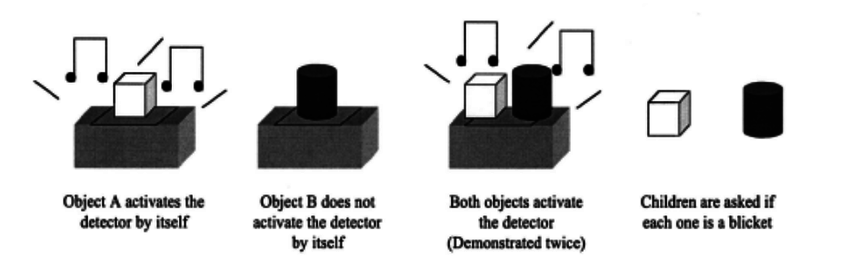

### Figure 2. Schematic of Experimental Design

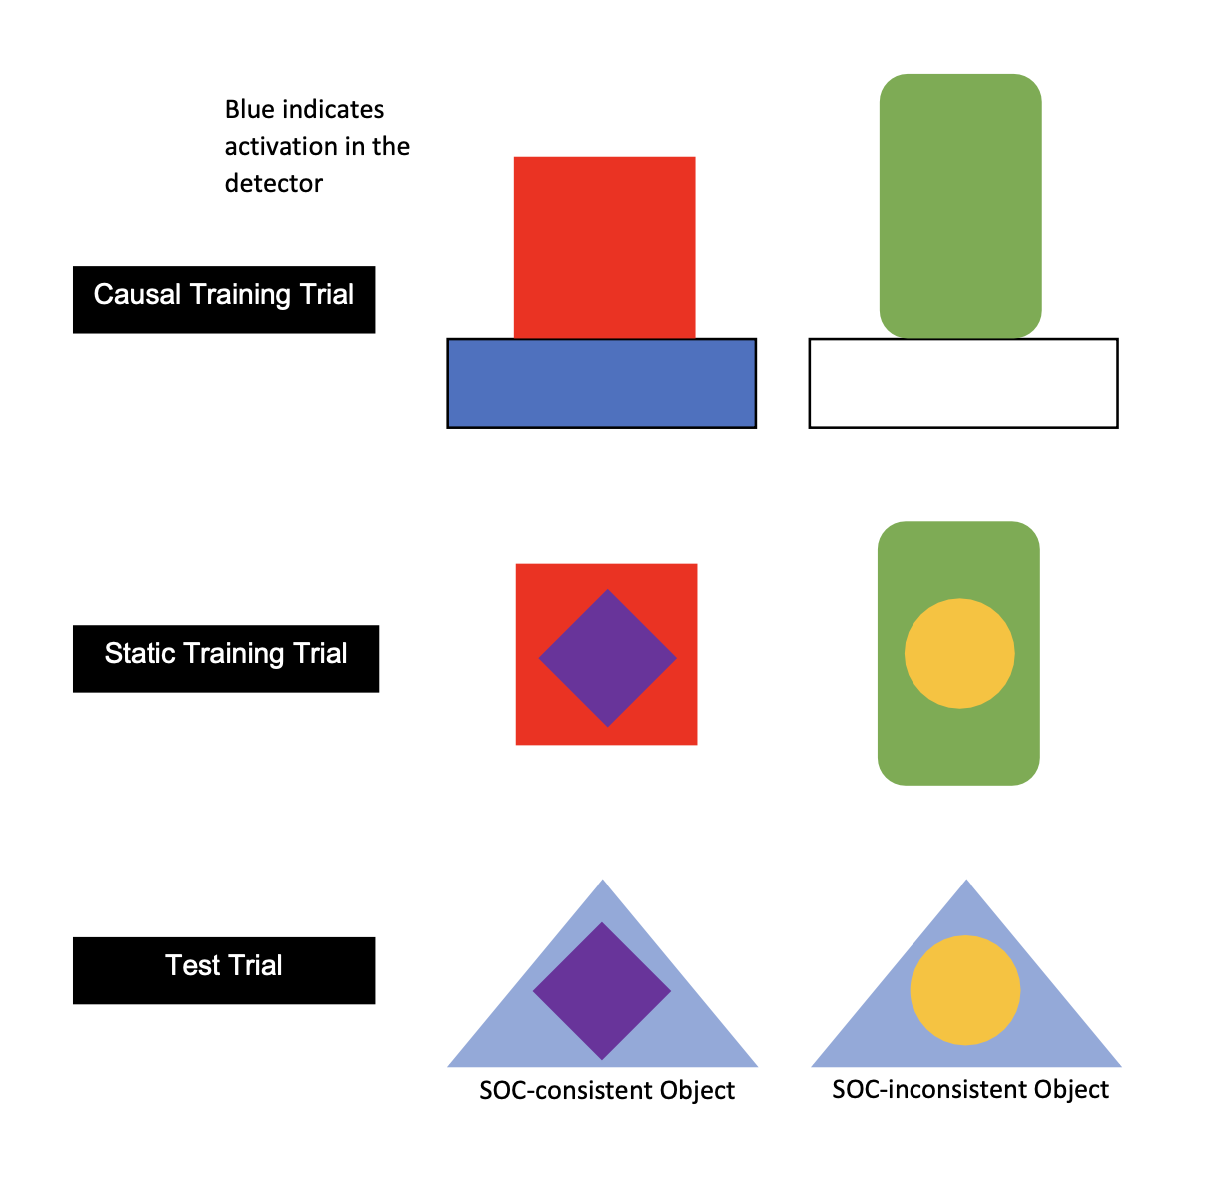

## Variables of Interest

**Subject ID**: ID
**Demographic Measures**
*   **gender**: Self-report by participants
*   **age**: Self-report by participants in years

**Training and Task Conditions**
*   **task_order** : The order of task presentation (simple first/highmem first)
*   **task_type** : The task type (simple / highmem)
*   **training_order** Order of stimuli training (causal first / noncausal first)
*   **task_con** : Stimuli presented during task

**Causal Inference Measures**
*   **object1** : Binary Yes/No response to the first object presented ("Will this object activate the blicket detector?")
*   **object1_confidence** : Self-report 0-100 confidence rating of object evaluation
*   **object1_confidence_norm** : 0 indicates "definitely not a blicket", 100 indicates "definitely a blicket" - confidence rating normalized by the binary evaluation (e.g., object1 == no and object1_confidence == 60, then object1_confidence_norm == 40)
*   **object1_response** : Binary Correct/Incorrect
*   **object2** : Binary Yes/No response to the second object presented ("Will this object activate the blicket detector?")
*   **object2_confidence** : Self-report 0-100 confidence rating of object evaluation
*   **object2_confidence_norm** : 0 indicates "definitely not a blicket", 100 indicates "definitely a blicket" - confidence rating normalized by the binary evaluation
*   **object2_response** : Binary Correct/Incorrect
*   **response_cat** : Binary Correct/Incorrect based on getting both object1 and object2 evaluations correct
*   **mem_check** : Binary Pass/Fail - Does the participant pass the necessary memory checks?





## Hypothesis

---


The first research question is simply, "Can adult participants engage in second-order correlation (SOC) learning to make causal inferences in the above described task?"

Putting this into a **verbal hypothesis**: The probability of selecting the correct object but not the incorrect object is greater than random chance.

Putting this into a **statistical form**: $P(response = correct) > 0.5$


---


The second research question is, "Are adults inference performance in the task affected by the timing of causal training presentation?"

Direction of change in inference performance is not hypothesized because there is no a priori reason to predict one over the other. More specifically, we are agnostic between a positive increase in inference performance with early causal training vs. negative decrease in inference performance with early causal training, both can be plausibly justified, and can be explored further in a follow-up if effect is found.

Putting this into a **verbal hypothesis**: The timing of causal training presentation affects the log-odds of successful inference performance in the task.

Putting this into a **statistical form**:

We can state the model as, ${logit}(P(Y_{ij} = 1)) = \beta_0 + \beta_1 X_{ij} +
 u_i$, where $Y_{ij}$ represents the binary response variable for participant $i$ given training order condition $j$ and $\beta_1$ indicates the coefficient for the training order.

Thus, given our hypothesis, we expect $\beta_1 \neq 0$

## Data Organization

The raw data is in a wide format that codes every condition and choice in the experiment independently. For example, the raw data contains variables train1 and test1 but these two variables in fact combine to form one experimental condition that is counterbalanced across the experiment. Similarly, there are series of memory check variables called memCheck1, memCheck2, and so on which combine to determine whether a given participant has passed the memory checks or not.

As such, the data needs be 1. cleaned and consolidated to produce more individually meaningful variables that we can manipulate for analysis, and 2. reshaped into a long format.


## Data Cleansing and Auditing

In [3]:
# load relevant libraries preemptively.
library(tidyverse)
#install.packages("lme4")
library(lme4)
#install.packages("GGally")
library(GGally)
#install.packages("boot")
library(boot)
#install.packages("car")
library(car)

In [6]:
raw_data <- read.csv(file="raw_data_030324.csv")
dem_dat <- read.csv(file="dem_data_030324.csv")

In [48]:
merged_data <- merge(raw_data, dem_dat, by.x = "id", by.y = "ID", all = TRUE)
head(merged_data)

,id,train1,test1,train2,test2,test1_object1,test1_object1_confidence,test1_object2,test1_object2_confidence,test1_memCheck1,⋯,test2_memCheck4,test2_memCheck4_confidence,test2_memCheck_base,test2_memCheck_base_confidence,test2_memCheck_feature,test2_memCheck_feature_confidence,open.ended.definition,Gender,Class.Year,Age
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>
1,1,1A,PD,1Aa,PT,yes,60,yes,55,2,⋯,4,90,1,90,2,70,,Female,2026,19
2,2,1B,PD,1Ab,PT,no,60,yes,80,1,⋯,3,50,2,80,3,50,,Female,2027,18
3,3,1C,PD,1Ac,PT,yes,50,yes,50,1,⋯,2,99,1,99,1,99,,Male,2024,21
4,4,1D,PD,1Ad,PT,no,95,yes,95,2,⋯,1,100,1,100,1,100,"""the object or shape that is inside the object""",Male,2025,20
5,5,1A,YC,1Ba,PT,no,75,no,60,2,⋯,4,100,1,100,2,100,"""shapes and colors!""",Female,2027,19
6,6,1B,YC,1Bb,PT,no,30,yes,30,1,⋯,3,70,1,80,2,80,"""it's probably based on the object inside that makes something a blicket""",Female,2026,19


### Experiment Conditions

First, create a new variable indicating whether the participant was presented with the simple task or the high memory task first.

In [9]:
data <- merged_data %>%
  mutate(task_order = if_else(nchar(train1) == 2, "simple_first",
                              if_else(nchar(train1) == 3, "highmem_first", NA_character_))) %>%
  mutate(task_order = factor(task_order))

table(data[, 'task_order'])


highmem_first  simple_first 
           32            50 

Next, create a new variable indicating the training order that the participant experienced within each task ('training_order_task1', 'training_order_task2')

In [10]:
data <- data %>%
  # Create 'training_order_task1' based on 'train1'
  mutate(training_order_task1 = case_when(
    str_detect(train1, "^[1-2]") ~ "causal_first",
    str_detect(train1, "^[A-Za-z]") ~ "noncausal_first",
    TRUE ~ NA_character_  # Handles potential cases that don't start with 1, 2, or a letter
  )) %>%
  # Create 'training_order_task2' based on 'train2'
  mutate(training_order_task2 = case_when(
    str_detect(train2, "^[1-2]") ~ "causal_first",
    str_detect(train2, "^[A-Za-z]") ~ "noncausal_first",
    TRUE ~ NA_character_  # Handles potential cases that don't start with 1, 2, or a letter
  )) %>%
  mutate(
    training_order_task1 = factor(training_order_task1),
    training_order_task2 = factor(training_order_task2)
  )
head(data[, c('training_order_task1', 'training_order_task2')])

,training_order_task1,training_order_task2
,<fct>,<fct>
1,causal_first,causal_first
2,causal_first,causal_first
3,causal_first,causal_first
4,causal_first,causal_first
5,causal_first,causal_first
6,causal_first,causal_first


### Trial Conditions

Right now, the trial training and test conditions are stored separately. Create a new trial_con variable that combines the information - this is to check trial condition effect on behavioral response

In [11]:
data <- data %>%
  mutate(
    task1_con = str_c(train1, test1, sep = ""),  # Concatenates train1 and test1
    task2_con = str_c(train2, test2, sep = "")   # Concatenates train2 and test2
  )  %>%
  mutate(
    task1_con = factor(task1_con),
    task2_con = factor(task2_con)
  )
head(data[, c('task1_con', 'task2_con')])

,task1_con,task2_con
,<fct>,<fct>
1,1APD,1AaPT
2,1BPD,1AbPT
3,1CPD,1AcPT
4,1DPD,1AdPT
5,1AYC,1BaPT
6,1BYC,1BbPT


To simplify this even further, let's parse the task1_con and task2_con as
simple task condition and high memory task condition - I have the task_order saved, so it makes more sense to have task conditions saved for each task type

In [12]:
data <- data %>%
  mutate(
    simple_con = ifelse(nchar(as.character(task1_con)) == 4, as.character(task1_con),
                        ifelse(nchar(as.character(task2_con)) == 4, as.character(task2_con), NA)),
    highmem_con = ifelse(nchar(as.character(task1_con)) == 5, as.character(task1_con),
                         ifelse(nchar(as.character(task2_con)) == 5, as.character(task2_con), NA))
  )

Now we can recreate training_order based on simple and highmem as well


In [13]:
data <- data %>%
  # Create 'training_order_task1' based on 'train1'
  mutate(simple_training_order = case_when(
    str_detect(simple_con, "^[1-2]") ~ "causal_first",
    str_detect(simple_con, "^[A-Za-z]") ~ "noncausal_first",
    TRUE ~ NA_character_  # Handles potential cases that don't start with 1, 2, or a letter
  )) %>%
  # Create 'training_order_task2' based on 'train2'
  mutate(highmem_training_order = case_when(
    str_detect(highmem_con, "^[1-2]") ~ "causal_first",
    str_detect(highmem_con, "^[A-Za-z]") ~ "noncausal_first",
    TRUE ~ NA_character_  # Handles potential cases that don't start with 1, 2, or a letter
  )) %>%
  mutate(
    training_order_task1 = factor(simple_training_order),
    training_order_task2 = factor(highmem_training_order)
  )
head(data[, c('simple_training_order', 'highmem_training_order')])

,simple_training_order,highmem_training_order
,<chr>,<chr>
1,causal_first,causal_first
2,causal_first,causal_first
3,causal_first,causal_first
4,causal_first,causal_first
5,causal_first,causal_first
6,causal_first,causal_first


### Check participant response entries for error
Correct any errors as they are found. Starting with task 1.
We notice that there are some issues (e.g., typo by researcher after manual coding of experiment) with how the responses are coded.

In [14]:
# test1_response refers to 'simple' task response
print(merged_data %>%
  count(test1_object1, test1_object2))

# let's fix this typo 'mo' in test1_object2 and as.factor responses
data <- data %>%
  mutate(test1_object2 = str_replace(test1_object2, "mo", "no")) %>%
  mutate(test1_object1 = as.factor(test1_object1)) %>%
  mutate(test1_object2 = as.factor(test1_object2))

# we are also seeing that there's different counts of same responses
# could be due to spaces, etc.
data <- data %>%
  mutate(
    test1_object1 = str_to_lower(str_trim(test1_object1)), # Convert to lower case and trim spaces
    test1_object2 = str_to_lower(str_trim(test1_object2))  # Convert to lower case and trim spaces
  )

# to keep the variable naming scheme consistent
data$simple_object1 <- data$test1_object1
data$simple_object2 <- data$test1_object2

#check again
print(data %>%
  count(simple_object1, simple_object2))

  test1_object1 test1_object2  n
1            no            mo  1
2            no            no 29
3            no           no   1
4            no           yes 16
5           yes            no 25
6           yes           yes 10
  simple_object1 simple_object2  n
1             no             no 31
2             no            yes 16
3            yes             no 25
4            yes            yes 10


We repeat this cleaning and auditing for task 2.

In [15]:
# test2_response refers to 'highmem' task
print(merged_data %>%
  count(test2_object1, test2_object2))

# we are also seeing that theres different counts of same responses
# could be due to spaces, etc.
data <- data %>%
  mutate(
    test2_object1 = str_to_lower(str_trim(test2_object1)), # Convert to lower case and trim spaces
    test2_object2 = str_to_lower(str_trim(test2_object2))  # Convert to lower case and trim spaces
  )

# just keep the variable naming scheme consistent
data$highmem_object1 <- data$test2_object1
data$highmem_object2 <- data$test2_object2

# now check again
print(data %>%
  count(highmem_object1, highmem_object2))

  test2_object1 test2_object2  n
1            no            no 30
2            no           yes 27
3           no            yes  1
4           no           yes   1
5           yes            no 18
6           yes           yes  5
  highmem_object1 highmem_object2  n
1              no              no 30
2              no             yes 29
3             yes              no 18
4             yes             yes  5


### Trial Correct Answers (for both simple and high memory conditions)


In [16]:
# In raw data, test1 always refers to 'simple' task
# and test2 alwayas refers to 'highmem' task
data <- data %>%
  mutate(
    simple_object1_correct = case_when(
      task_order == "simple_first" & task1_con %in% c('1APD', '1BPD', '1CYC',
                                                       '1DYC', 'A1PD', 'B1PD',
                                                       'C1YC', 'D1YC', '2AYC',
                                                       '2BYC', '2CPD', '2DPD',
                                                       'A2YC', 'B2YC', 'C2PD', 'D2PD') ~ "yes",
      task_order == "simple_first" & task1_con %in% c('1AYC', '1BYC', '1CPD',
                                                       '1DPD', 'A1YC', 'B1YC',
                                                       'C1PD', 'D1PD', '2APD',
                                                       'A2PD', '2BPD', 'B2PD',
                                                       '2CYC', 'C2YC', '2DYC', 'D2YC') ~ "no",
      task_order == "highmem_first" & task2_con %in% c('1APD', '1BPD', '1CYC',
                                                         '1DYC', 'A1PD', 'B1PD',
                                                         'C1YC', 'D1YC', '2AYC',
                                                         '2BYC', '2CPD', '2DPD',
                                                         'A2YC', 'B2YC', 'C2PD', 'D2PD') ~ "yes",
      task_order == "highmem_first" & task2_con %in% c('1AYC', '1BYC', '1CPD',
                                                         '1DPD', 'A1YC', 'B1YC',
                                                         'C1PD', 'D1PD', '2APD',
                                                         'A2PD', '2BPD', 'B2PD',
                                                         '2CYC', 'C2YC', '2DYC', 'D2YC') ~ "no",
      TRUE ~ NA_character_ # Handles cases not covered above
    ),
    simple_object2_correct = case_when(
      task_order == "simple_first" & task1_con %in% c('1APD', '1BPD', '1CYC',
                                                       '1DYC', 'A1PD', 'B1PD',
                                                       'C1YC', 'D1YC', '2AYC',
                                                       '2BYC', '2CPD', '2DPD',
                                                       'A2YC', 'B2YC', 'C2PD', 'D2PD') ~ "no",
      task_order == "simple_first" & task1_con %in% c('1AYC', '1BYC', '1CPD',
                                                       '1DPD', 'A1YC', 'B1YC',
                                                       'C1PD', 'D1PD', '2APD',
                                                       'A2PD', '2BPD', 'B2PD',
                                                       '2CYC', 'C2YC', '2DYC', 'D2YC') ~ "yes",
      task_order == "highmem_first" & task2_con %in% c('1APD', '1BPD', '1CYC',
                                                         '1DYC', 'A1PD', 'B1PD',
                                                         'C1YC', 'D1YC', '2AYC',
                                                         '2BYC', '2CPD', '2DPD',
                                                         'A2YC', 'B2YC', 'C2PD', 'D2PD') ~ "no",
      task_order == "highmem_first" & task2_con %in% c('1AYC', '1BYC', '1CPD',
                                                         '1DPD', 'A1YC', 'B1YC',
                                                         'C1PD', 'D1PD', '2APD',
                                                         'A2PD', '2BPD', 'B2PD',
                                                         '2CYC', 'C2YC', '2DYC', 'D2YC') ~ "yes",
      TRUE ~ NA_character_  # Handles cases not covered above
    ),
    highmem_object1_correct = case_when(
      task_order == "simple_first" & task2_con %in% c('1AaPT','1AbPT','1AcPT',
                                                         '1AdPT','1BaGL','1BbGL',
                                                         '1BcGL','1BdGL','2AaGL',
                                                         '2AbGL','2AcGL','2AdGL',
                                                         '2BaPT','2BbPT','2BcPT',
                                                         '2BdPT','Aa1PT','Ab1PT',
                                                         'Ac1PT','Ad1PT','Ba1GL',
                                                         'Bb1GL','Bc1GL','Bd1GL',
                                                         'Aa2GL','Ab2GL','Ac2GL',
                                                         'Ad2GL','Ba2PT','Bb2PT',
                                                         'Bc2PT','Bd2PT') ~ "yes",
      task_order == "simple_first" & task2_con %in% c('1AaGL','1AbGL','1AcGL',
                                                         '1AdGL','1BaPT','1BbPT',
                                                         '1BcPT','1BdPT','2AaPT',
                                                         '2AbPT','2AcPT','2AdPT',
                                                         '2BaGL','2BbGL','2BcGL',
                                                         '2BdGL','Aa1GL','Ab1GL',
                                                         'Ac1GL','Ad1GL','Ba1PT',
                                                         'Bb1PT','Bc1PT','Bd1PT',
                                                         'Aa2PT','Ab2PT','Ac2PT',
                                                         'Ad2PT','Ba2GL','Bb2GL',
                                                         'Bc2GL','Bd2GL') ~ "no",
      task_order == "highmem_first" & task1_con %in% c('1AaPT','1AbPT','1AcPT',
                                                         '1AdPT','1BaGL','1BbGL',
                                                         '1BcGL','1BdGL','2AaGL',
                                                         '2AbGL','2AcGL','2AdGL',
                                                         '2BaPT','2BbPT','2BcPT',
                                                         '2BdPT','Aa1PT','Ab1PT',
                                                         'Ac1PT','Ad1PT','Ba1GL',
                                                         'Bb1GL','Bc1GL','Bd1GL',
                                                         'Aa2GL','Ab2GL','Ac2GL',
                                                         'Ad2GL','Ba2PT','Bb2PT',
                                                         'Bc2PT','Bd2PT') ~ "yes",
      task_order == "highmem_first" & task1_con %in% c('1AaGL','1AbGL','1AcGL',
                                                         '1AdGL','1BaPT','1BbPT',
                                                         '1BcPT','1BdPT','2AaPT',
                                                         '2AbPT','2AcPT','2AdPT',
                                                         '2BaGL','2BbGL','2BcGL',
                                                         '2BdGL','Aa1GL','Ab1GL',
                                                         'Ac1GL','Ad1GL','Ba1PT',
                                                         'Bb1PT','Bc1PT','Bd1PT',
                                                         'Aa2PT','Ab2PT','Ac2PT',
                                                         'Ad2PT','Ba2GL','Bb2GL',
                                                         'Bc2GL','Bd2GL') ~ "no",
      TRUE ~ NA_character_ # Handles cases not covered above
    ),
    highmem_object2_correct = case_when(
      task_order == "simple_first" & task2_con %in% c('1AaPT','1AbPT','1AcPT',
                                                         '1AdPT','1BaGL','1BbGL',
                                                         '1BcGL','1BdGL','2AaGL',
                                                         '2AbGL','2AcGL','2AdGL',
                                                         '2BaPT','2BbPT','2BcPT',
                                                         '2BdPT','Aa1PT','Ab1PT',
                                                         'Ac1PT','Ad1PT','Ba1GL',
                                                         'Bb1GL','Bc1GL','Bd1GL',
                                                         'Aa2GL','Ab2GL','Ac2GL',
                                                         'Ad2GL','Ba2PT','Bb2PT',
                                                         'Bc2PT','Bd2PT') ~ "no",
      task_order == "simple_first" & task2_con %in% c('1AaGL','1AbGL','1AcGL',
                                                         '1AdGL','1BaPT','1BbPT',
                                                         '1BcPT','1BdPT','2AaPT',
                                                         '2AbPT','2AcPT','2AdPT',
                                                         '2BaGL','2BbGL','2BcGL',
                                                         '2BdGL','Aa1GL','Ab1GL',
                                                         'Ac1GL','Ad1GL','Ba1PT',
                                                         'Bb1PT','Bc1PT','Bd1PT',
                                                         'Aa2PT','Ab2PT','Ac2PT',
                                                         'Ad2PT','Ba2GL','Bb2GL',
                                                         'Bc2GL','Bd2GL') ~ "yes",
      task_order == "highmem_first" & task1_con %in% c('1AaPT','1AbPT','1AcPT',
                                                         '1AdPT','1BaGL','1BbGL',
                                                         '1BcGL','1BdGL','2AaGL',
                                                         '2AbGL','2AcGL','2AdGL',
                                                         '2BaPT','2BbPT','2BcPT',
                                                         '2BdPT','Aa1PT','Ab1PT',
                                                         'Ac1PT','Ad1PT','Ba1GL',
                                                         'Bb1GL','Bc1GL','Bd1GL',
                                                         'Aa2GL','Ab2GL','Ac2GL',
                                                         'Ad2GL','Ba2PT','Bb2PT',
                                                         'Bc2PT','Bd2PT') ~ "no",
      task_order == "highmem_first" & task1_con %in% c('1AaGL','1AbGL','1AcGL',
                                                         '1AdGL','1BaPT','1BbPT',
                                                         '1BcPT','1BdPT','2AaPT',
                                                         '2AbPT','2AcPT','2AdPT',
                                                         '2BaGL','2BbGL','2BcGL',
                                                         '2BdGL','Aa1GL','Ab1GL',
                                                         'Ac1GL','Ad1GL','Ba1PT',
                                                         'Bb1PT','Bc1PT','Bd1PT',
                                                         'Aa2PT','Ab2PT','Ac2PT',
                                                         'Ad2PT','Ba2GL','Bb2GL',
                                                         'Bc2GL','Bd2GL') ~ "yes",
      TRUE ~ NA_character_ # Handles cases not covered above
    )
  )

### Simple and High Memory Correct Binary Choice between object1 and object2


In [17]:
data <- data %>%
  mutate(
    simple_binary_correct = case_when(
      simple_object1_correct == "yes" & simple_object2_correct == "no" ~ "simple_object1",
      simple_object1_correct == "no" & simple_object2_correct == "yes" ~ "simple_object2",
      TRUE ~ NA_character_  # Handles cases not covered by the above conditions
    ),
    highmem_binary_correct = case_when(
      highmem_object1_correct == "yes" & highmem_object2_correct == "no" ~ "highmem_object1",
      highmem_object1_correct == "no" & highmem_object2_correct == "yes" ~ "highmem_object2",
      TRUE ~ NA_character_  # Handles cases not covered by the above conditions
    )
  )

### Compare Correct Answers to Participant responses (Correct or Incorrect)

Participants are considered correct when they get both object responses correctly.

In [19]:
data <- data %>%
  mutate(
    simple_object1_response =
      if_else(test1_object1==simple_object1_correct,
              "correct",
              "incorrect"),
    simple_object2_response =
      if_else(test1_object2==simple_object2_correct,
              "correct",
              "incorrect"),
    highmem_object1_response =
      if_else(test2_object1==highmem_object1_correct,
              "correct",
              "incorrect"),
   highmem_object2_response =
     if_else(test2_object2==highmem_object2_correct,
             "correct",
             "incorrect")
   ) %>%
  mutate(
    simple_object1_response =
      relevel(factor(simple_object1_response),ref="incorrect"),
    simple_object2_response =
      relevel(factor(simple_object2_response),ref="incorrect"),
    highmem_object1_response =
      relevel(factor(highmem_object1_response),ref="incorrect"),
    highmem_object2_response =
      relevel(factor(highmem_object2_response),ref="incorrect")
  )

In [20]:
data <- data %>%
  mutate(
    simple_response = if_else(
      simple_object1_response == "correct" & simple_object2_response == "correct",
      "soc_correct",
      "soc_incorrect"
    ),
    highmem_response = if_else(
      highmem_object1_response == "correct" & highmem_object2_response == "correct",
      "soc_correct",
      "soc_incorrect"
    )
  ) %>%
  mutate(
    simple_response = factor(simple_response),
    highmem_response = factor(highmem_response)
  )

data$simple_response <- relevel(data$simple_response,ref="soc_incorrect")
data$highmem_response <- relevel(data$highmem_response,ref="soc_incorrect")

table(data$simple_response)
table(data$highmem_response)


soc_incorrect   soc_correct 
           47            35 


soc_incorrect   soc_correct 
           37            45 

### Confidence Rating for both objects
I measured the participant's confidence with respect to the choice.
Re-code confidence rating with respect to 'blicket' or 'not blicket'
0 (not blicket) - 100 (blicket)

In [21]:
data$simple_object1_confidence_norm <- ifelse(data$test1_object1 == "yes",
                                         data$test1_object1_confidence,
                                         100 - data$test1_object1_confidence)
data$simple_object2_confidence_norm <- ifelse(data$test1_object2 == "yes",
                                         data$test1_object2_confidence,
                                         100 - data$test1_object2_confidence)
data$highmem_object1_confidence_norm <- ifelse(data$test2_object1 == "yes",
                                         data$test2_object1_confidence,
                                         100 - data$test2_object1_confidence)
data$highmem_object2_confidence_norm <- ifelse(data$test2_object2 == "yes",
                                         data$test2_object2_confidence,
                                         100 - data$test2_object2_confidence)

### Correct Memory Check Answers for simple Test


In [22]:
data <- data %>%
  mutate(
    simple_m1_correct = case_when(
      (task_order == "simple_first" &
       task1_con %in% c("1BPD", "1BYC", "B1PD", "B1YC", "1CPD", "1CYC", "C1PD", "C1YC", "2BPD", "2BYC", "B2PD", "B2YC", "2CPD", "2CYC", "C2PD", "C2YC")) |
      (task_order == "highmem_first" &
       task2_con %in% c("1BPD", "1BYC", "B1PD", "B1YC", "1CPD", "1CYC", "C1PD", "C1YC", "2BPD", "2BYC", "B2PD", "B2YC", "2CPD", "2CYC", "C2PD", "C2YC")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task1_con %in% c("1APD", "1AYC", "A1PD", "A1YC", "1DPD", "1DYC", "D1PD", "D1YC", "2APD", "2AYC", "A2PD", "A2YC", "2DPD", "2DYC", "D2PD", "D2YC")) |
      (task_order == "highmem_first" &
       task2_con %in% c("1APD", "1AYC", "A1PD", "A1YC", "1DPD", "1DYC", "D1PD", "D1YC", "2APD", "2AYC", "A2PD", "A2YC", "2DPD", "2DYC", "D2PD", "D2YC")) ~ as.numeric(2),
      TRUE ~ NA_real_
    ),
    simple_m2_correct = case_when(
      (task_order == "simple_first" &
       task1_con %in% c("1APD", "1AYC", "A1PD", "A1YC", "1DPD", "1DYC", "D1PD", "D1YC", "2APD", "2AYC", "A2PD", "A2YC", "2DPD", "2DYC", "D2PD", "D2YC")) |
      (task_order == "highmem_first" &
       task2_con %in% c("1APD", "1AYC", "A1PD", "A1YC", "1DPD", "1DYC", "D1PD", "D1YC", "2APD", "2AYC", "A2PD", "A2YC", "2DPD", "2DYC", "D2PD", "D2YC")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task1_con %in% c("1BPD", "1BYC", "B1PD", "B1YC", "1CPD", "1CYC", "C1PD", "C1YC", "2BPD", "2BYC", "B2PD", "B2YC", "2CPD", "2CYC", "C2PD", "C2YC")) |
      (task_order == "highmem_first" &
       task2_con %in% c("1BPD", "1BYC", "B1PD", "B1YC", "1CPD", "1CYC", "C1PD", "C1YC", "2BPD", "2BYC", "B2PD", "B2YC", "2CPD", "2CYC", "C2PD", "C2YC")) ~ as.numeric(2),
      TRUE ~ NA_real_
    ),
    simple_m3_correct = case_when(
      (task_order == "simple_first" &
       task1_con %in% c("1APD", "1AYC", "A1PD", "A1YC", "1BPD", "1BYC", "B1PD", "B1YC", "1CPD", "1CYC", "C1PD", "C1YC", "1DPD", "1DYC", "D1PD", "D1YC")) |
      (task_order == "highmem_first" &
       task2_con %in% c("1APD", "1AYC", "A1PD", "A1YC", "1BPD", "1BYC", "B1PD", "B1YC", "1CPD", "1CYC", "C1PD", "C1YC", "1DPD", "1DYC", "D1PD", "D1YC")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task1_con %in% c("2APD", "2AYC", "A2PD", "A2YC", "2BPD", "2BYC", "B2PD", "B2YC", "2CPD", "2CYC", "C2PD", "C2YC", "2DPD", "2DYC", "D2PD", "D2YC")) |
      (task_order == "highmem_first" &
       task2_con %in% c("2APD", "2AYC", "A2PD", "A2YC", "2BPD", "2BYC", "B2PD", "B2YC", "2CPD", "2CYC", "C2PD", "C2YC", "2DPD", "2DYC", "D2PD", "D2YC")) ~ as.numeric(2),
      TRUE ~ NA_real_
    ),
    simple_m4_correct = case_when(
      (task_order == "simple_first" &
       task1_con %in% c("1APD", "1AYC", "A1PD", "A1YC", "1BPD", "1BYC", "B1PD", "B1YC", "2CPD", "2CYC", "C2PD", "C2YC", "2DPD", "2DYC", "D2PD", "D2YC")) |
      (task_order == "highmem_first" &
       task2_con %in% c("1APD", "1AYC", "A1PD", "A1YC", "1BPD", "1BYC", "B1PD", "B1YC", "2CPD", "2CYC", "C2PD", "C2YC", "2DPD", "2DYC", "D2PD", "D2YC")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task1_con %in% c("1CPD", "1CYC", "C1PD", "C1YC", "1DPD", "1DYC", "D1PD", "D1YC", "2APD", "2AYC", "A2PD", "A2YC", "2BPD", "2BYC", "B2PD", "B2YC")) |
      (task_order == "highmem_first" &
       task2_con %in% c("1CPD", "1CYC", "C1PD", "C1YC", "1DPD", "1DYC", "D1PD", "D1YC", "2APD", "2AYC", "A2PD", "A2YC", "2BPD", "2BYC", "B2PD", "B2YC")) ~ as.numeric(2),
      TRUE ~ NA_real_
    )
  )

### Compare Memory Checks for simple Test


In [23]:
data <- data %>%
  mutate(
    simple_mem_check = case_when(
      test1_memCheck1 == simple_m1_correct &
      test1_memCheck2 == simple_m2_correct &
      test1_memCheck_base == simple_m3_correct ~ "pass",

      TRUE ~ "fail"
    )
  ) %>%
  mutate(
    simple_mem_check = factor(simple_mem_check)
  )
table(data$simple_mem_check)


fail pass 
  15   67 

### Correct Memory Check Answers for highmem Test


In [25]:
data <- data %>%
  mutate(
    highmem_m1_correct = case_when(
      (task_order == "simple_first" &
       task2_con %in% c("1AaPT", "1AaGL", "1BbPT", "1BbGL", "2AaPT", "2AaGL", "2BbPT", "2BbGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AaPT", "1AaGL", "1BbPT", "1BbGL", "2AaPT", "2AaGL", "2BbPT", "2BbGL")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task2_con %in% c("1AbPT", "1AbGL", "1BaPT", "1BaGL", "2AbPT", "2AbGL", "2BaPT", "2BaGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AbPT", "1AbGL", "1BaPT", "1BaGL", "2AbPT", "2AbGL", "2BaPT", "2BaGL")) ~ as.numeric(2),
      (task_order == "simple_first" &
       task2_con %in% c("1AcPT", "1AcGL", "1BcPT", "1BcGL", "2AcPT", "2AcGL", "2BcPT", "2BcGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AcPT", "1AcGL", "1BcPT", "1BcGL", "2AcPT", "2AcGL", "2BcPT", "2BcGL")) ~ as.numeric(3),
      (task_order == "simple_first" &
       task2_con %in% c("1AdPT", "1AdGL", "1BdPT", "1BdGL", "2AdPT", "2AdGL", "2BdPT", "2BdGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AdPT", "1AdGL", "1BdPT", "1BdGL", "2AdPT", "2AdGL", "2BdPT", "2BdGL")) ~ as.numeric(4),
      TRUE ~ NA_real_
    ),
    highmem_m2_correct = case_when(
      (task_order == "simple_first" &
       task2_con %in% c("1AcPT", "1AcGL", "1BaPT", "1BaGL", "2AcPT", "2AcGL", "2BaPT", "2BaGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AcPT", "1AcGL", "1BaPT", "1BaGL", "2AcPT", "2AcGL", "2BaPT", "2BaGL")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task2_con %in% c("1AaPT", "1AaGL", "1BcPT", "1BcGL", "2AaPT", "2AaGL", "2BcPT", "2BcGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AaPT", "1AaGL", "1BcPT", "1BcGL", "2AaPT", "2AaGL", "2BcPT", "2BcGL")) ~ as.numeric(2),
      (task_order == "simple_first" &
       task2_con %in% c("1AdPT", "1AdGL", "1BdPT", "1BdGL", "2AdPT", "2AdGL", "2BdPT", "2BdGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AdPT", "1AdGL", "1BdPT", "1BdGL", "2AdPT", "2AdGL", "2BdPT", "2BdGL")) ~ as.numeric(3),
      (task_order == "simple_first" &
       task2_con %in% c("1AbPT", "1AbGL", "1BbPT", "1BbGL", "2AbPT", "2AbGL", "2BbPT", "2BbGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AbPT", "1AbGL", "1BbPT", "1BbGL", "2AbPT", "2AbGL", "2BbPT", "2BbGL")) ~ as.numeric(4),
      TRUE ~ NA_real_
    ),
    highmem_m3_correct = case_when(
      (task_order == "simple_first" &
       task2_con %in% c("1AbPT", "1AbGL", "1BdPT", "1BdGL", "2AbPT", "2AbGL", "2BdPT", "2BdGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AbPT", "1AbGL", "1BdPT", "1BdGL", "2AbPT", "2AbGL", "2BdPT", "2BdGL")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task2_con %in% c("1AdPT", "1AdGL", "1BbPT", "1BbGL", "2AdPT", "2AdGL", "2BbPT", "2BbGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AdPT", "1AdGL", "1BbPT", "1BbGL", "2AdPT", "2AdGL", "2BbPT", "2BbGL")) ~ as.numeric(2),
      (task_order == "simple_first" &
       task2_con %in% c("1AaPT", "1AaGL", "1BaPT", "1BaGL", "2AaPT", "2AaGL", "2BaPT", "2BaGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AaPT", "1AaGL", "1BaPT", "1BaGL", "2AaPT", "2AaGL", "2BaPT", "2BaGL")) ~ as.numeric(3),
      (task_order == "simple_first" &
       task2_con %in% c("1AcPT", "1AcGL", "1BcPT", "1BcGL", "2AcPT", "2AcGL", "2BcPT", "2BcGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AcPT", "1AcGL", "1BcPT", "1BcGL", "2AcPT", "2AcGL", "2BcPT", "2BcGL")) ~ as.numeric(4),
      TRUE ~ NA_real_
    ),
    highmem_m4_correct = case_when(
      (task_order == "simple_first" &
       task2_con %in% c("1AdPT", "1AdGL", "1BcPT", "1BcGL", "2AdPT", "2AdGL", "2BcPT", "2BcGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AdPT", "1AdGL", "1BcPT", "1BcGL", "2AdPT", "2AdGL", "2BcPT", "2BcGL")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task2_con %in% c("1AcPT", "1AcGL", "1BdPT", "1BdGL", "2AcPT", "2AcGL", "2BdPT", "2BdGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AcPT", "1AcGL", "1BdPT", "1BdGL", "2AcPT", "2AcGL", "2BdPT", "2BdGL")) ~ as.numeric(2),
      (task_order == "simple_first" &
       task2_con %in% c("1AbPT", "1AbGL", "1BbPT", "1BbGL", "2AbPT", "2AbGL", "2BbPT", "2BbGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AbPT", "1AbGL", "1BbPT", "1BbGL", "2AbPT", "2AbGL", "2BbPT", "2BbGL")) ~ as.numeric(3),
      (task_order == "simple_first" &
       task2_con %in% c("1AaPT", "1AaGL", "1BaPT", "1BaGL", "2AaPT", "2AaGL", "2BaPT", "2BaGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AaPT", "1AaGL", "1BaPT", "1BaGL", "2AaPT", "2AaGL", "2BaPT", "2BaGL")) ~ as.numeric(4),
      TRUE ~ NA_real_
    ),
    highmem_m5_correct = case_when(
      (task_order == "simple_first" &
       task2_con %in% c("1AaPT", "1AaGL", "1AbPT", "1AbGL", "1AcPT", "1AcGL", "1AdPT", "1AdGL", "1BaPT", "1BaGL", "1BbPT", "1BbGL", "1BcPT", "1BcGL", "1BdPT", "1BdGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AaPT", "1AaGL", "1AbPT", "1AbGL", "1AcPT", "1AcGL", "1AdPT", "1AdGL", "1BaPT", "1BaGL", "1BbPT", "1BbGL", "1BcPT", "1BcGL", "1BdPT", "1BdGL")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task2_con %in% c("2AaPT", "2AaGL", "2AbPT", "2AbGL", "2AcPT", "2AcGL", "2AdPT", "2AdGL", "2BaPT", "2BaGL", "2BbPT", "2BbGL", "2BcPT", "2BcGL", "2BdPT", "2BdGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("2AaPT", "2AaGL", "2AbPT", "2AbGL", "2AcPT", "2AcGL", "2AdPT", "2AdGL", "2BaPT", "2BaGL", "2BbPT", "2BbGL", "2BcPT", "2BcGL", "2BdPT", "2BdGL")) ~ as.numeric(2),
      TRUE ~ NA_real_
    ),
    highmem_m6_correct = case_when(
      (task_order == "simple_first" &
       task2_con %in% c("1AaPT", "1AaGL", "1AbPT", "1AbGL", "1AcPT", "1AcGL", "1AdPT", "1AdGL", "2BaPT", "2BaGL", "2BbPT", "2BbGL", "2BcPT", "2BcGL", "2BdPT", "2BdGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1AaPT", "1AaGL", "1AbPT", "1AbGL", "1AcPT", "1AcGL", "1AdPT", "1AdGL", "2BaPT", "2BaGL", "2BbPT", "2BbGL", "2BcPT", "2BcGL", "2BdPT", "2BdGL")) ~ as.numeric(1),
      (task_order == "simple_first" &
       task2_con %in% c("1BaPT", "1BaGL", "1BbPT", "1BbGL", "1BcPT", "1BcGL", "1BdPT", "1BdGL", "2AaPT", "2AaGL", "2AbPT", "2AbGL", "2AcPT", "2AcGL", "2AdPT", "2AdGL")) |
      (task_order == "highmem_first" &
       task1_con %in% c("1BaPT", "1BaGL", "1BbPT", "1BbGL", "1BcPT", "1BcGL", "1BdPT", "1BdGL", "2AaPT", "2AaGL", "2AbPT", "2AbGL", "2AcPT", "2AcGL", "2AdPT", "2AdGL")) ~ as.numeric(2),
      TRUE ~ NA_real_
    )
  )

### Compare Memory Checks for highmem Test


In [26]:
data <- data %>%
  mutate(
    highmem_mem_check = case_when(
      test2_memCheck1 == highmem_m1_correct &
      test2_memCheck2 == highmem_m2_correct &
      test2_memCheck3 == highmem_m3_correct &
      test2_memCheck4 == highmem_m4_correct &
      test2_memCheck_base == highmem_m5_correct ~ "pass",
      TRUE ~ "fail"
    )
  ) %>%
  mutate(
    highmem_mem_check = factor(highmem_mem_check)
  )
table(data$highmem_mem_check)


fail pass 
  32   50 

### SOC Memory - which feature is a cause?


In [27]:
data <- data %>%
  mutate(
    simple_soc_check = case_when(
      test1_memCheck_feature == simple_m4_correct ~ "correct",
      TRUE ~ "incorrect"
    ),
    highmem_soc_check = case_when(
      test2_memCheck_feature == highmem_m6_correct ~ "correct",
      TRUE ~ "incorrect"
    )
  )
table(data$simple_soc_check)
table(data$highmem_soc_check)


  correct incorrect 
       70        12 


  correct incorrect 
       50        32 

### Selecting to create a clean dataframe
Only keep data that is relevant to my questions


In [31]:
# Create 'tidy_dat' by selecting variables from 'data'
tidy_dat <- data %>%
  select(id,
         gender = Gender, # to stay consistent with naming scheme
         age = Age,
         task_order,
         simple_training_order,
         highmem_training_order,
         simple_con,
         highmem_con,
         simple_object1,
         simple_object1_confidence = test1_object1_confidence,
         simple_object1_confidence_norm,
         simple_object1_response,
         simple_object2,
         simple_object2_confidence = test1_object2_confidence,
         simple_object2_confidence_norm,
         simple_object2_response,
         highmem_object1,
         highmem_object1_confidence_norm,
         highmem_object1_confidence = test2_object1_confidence,
         highmem_object1_response,
         highmem_object2,
         highmem_object2_confidence_norm,
         highmem_object2_confidence = test2_object2_confidence,
         highmem_object2_response,
         simple_response,
         highmem_response,
         simple_mem_check,
         highmem_mem_check,
         simple_soc_check,
         highmem_soc_check,
         simple_binary_correct,
         highmem_binary_correct)

# found errors in gender coding, fix.
tidy_dat <- tidy_dat %>%
  mutate(gender = as.factor(str_to_lower(str_trim(gender))))

tidy_dat$task_order <- as.factor(tidy_dat$task_order)
tidy_dat$simple_training_order <- as.factor(tidy_dat$simple_training_order)
tidy_dat$highmem_training_order <- as.factor(tidy_dat$highmem_training_order)
tidy_dat$simple_con <- as.factor(tidy_dat$simple_con)
tidy_dat$highmem_con <- as.factor(tidy_dat$highmem_con)
tidy_dat$simple_object1 <- as.factor(tidy_dat$simple_object1)
tidy_dat$highmem_object1 <- as.factor(tidy_dat$highmem_object1)
tidy_dat$simple_object2 <- as.factor(tidy_dat$simple_object2)
tidy_dat$highmem_object2 <- as.factor(tidy_dat$highmem_object2)
tidy_dat$simple_object1_response <- as.factor(tidy_dat$simple_object1_response)
tidy_dat$highmem_object1_response <- as.factor(tidy_dat$highmem_object1_response)
tidy_dat$simple_object2_response <- as.factor(tidy_dat$simple_object2_response)
tidy_dat$highmem_object2_response <- as.factor(tidy_dat$highmem_object2_response)
tidy_dat$simple_soc_check <- as.factor(tidy_dat$simple_soc_check)
tidy_dat$highmem_soc_check <- as.factor(tidy_dat$highmem_soc_check)
tidy_dat$simple_binary_correct <- as.factor(tidy_dat$simple_binary_correct)
tidy_dat$highmem_binary_correct <- as.factor(tidy_dat$highmem_binary_correct)


head(tidy_dat)

,id,gender,age,task_order,simple_training_order,highmem_training_order,simple_con,highmem_con,simple_object1,simple_object1_confidence,⋯,highmem_object2_confidence,highmem_object2_response,simple_response,highmem_response,simple_mem_check,highmem_mem_check,simple_soc_check,highmem_soc_check,simple_binary_correct,highmem_binary_correct
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,female,19,simple_first,causal_first,causal_first,1APD,1AaPT,yes,60,⋯,60,correct,soc_incorrect,soc_incorrect,pass,pass,incorrect,incorrect,simple_object1,highmem_object1
2,2,female,18,simple_first,causal_first,causal_first,1BPD,1AbPT,no,60,⋯,80,correct,soc_incorrect,soc_correct,fail,fail,incorrect,incorrect,simple_object1,highmem_object1
3,3,male,21,simple_first,causal_first,causal_first,1CPD,1AcPT,yes,50,⋯,90,correct,soc_incorrect,soc_correct,pass,pass,correct,correct,simple_object2,highmem_object1
4,4,male,20,simple_first,causal_first,causal_first,1DPD,1AdPT,no,95,⋯,99,correct,soc_correct,soc_correct,fail,pass,incorrect,correct,simple_object2,highmem_object1
5,5,female,19,simple_first,causal_first,causal_first,1AYC,1BaPT,no,75,⋯,50,correct,soc_incorrect,soc_correct,pass,pass,correct,correct,simple_object2,highmem_object2
6,6,female,19,simple_first,causal_first,causal_first,1BYC,1BbPT,no,30,⋯,30,correct,soc_correct,soc_correct,fail,pass,correct,correct,simple_object2,highmem_object2


### Save the Cleaned Data

In [32]:
write.csv(tidy_dat, "analysis_data_wide.csv", row.names = FALSE)

The raw data has now been cleaned and prepped for the most part. However, it is still not yet completely tidy data compliant. This is because the form of our hypothis tests require that our data be in a long format. Therefore, to be tidy data compliant, let's transform the dataframe into a long form.

### Tall Data Format Reshaping


In [34]:
tall_data <- reshape(tidy_dat,
                     varying=list(training_order = c(5,6),
                                  task_con = c(7,8),
                                  object1 = c(9,17),
                                  object1_confidence = c(10,19),
                                  object1_confidence_norm = c(11,18),
                                  object1_response = c(12,20),
                                  object2 = c(13,21),
                                  object2_confidence = c(14,22),
                                  object2_confidence_norm = c(15,23),
                                  object2_response = c(16,24),
                                  response_cat = c(25,26),
                                  mem_check = c(27,28),
                                  soc_check = c(29,30),
                                  binary_correct = c(31,32)),
                     v.names=c("training_order", "task_con", "object1",
                               "object1_confidence", "object1_confidence_norm",
                               "object1_response", "object2", "object2_confidence",
                               "object2_confidence_norm", "object2_response",
                               "response_cat", "mem_check", "soc_check", "binary_correct"),
                     ids = c("id", "gender", "age", "task_order"),
                     direction="long",
                     times=c("simple", "highmem"),
                     timevar="task_type",
                     new.row.names = 1:1e6)

tall_data <- tall_data %>%
  arrange(id) %>%
  mutate(task_type = as.factor((task_type)))

tall_data$binary_correct <- as.factor(sub("simple_", "", tall_data$binary_correct))
tall_data$binary_correct <- as.factor(sub("highmem_", "", tall_data$binary_correct))

head(tall_data)

,id,gender,age,task_order,task_type,training_order,task_con,object1,object1_confidence,object1_confidence_norm,object1_response,object2,object2_confidence,object2_confidence_norm,object2_response,response_cat,mem_check,soc_check,binary_correct
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,female,19,simple_first,simple,causal_first,1APD,yes,60,60,correct,yes,55,55,incorrect,soc_incorrect,pass,incorrect,object1
2,1,female,19,simple_first,highmem,causal_first,1AaPT,no,60,40,incorrect,no,40,60,correct,soc_incorrect,pass,incorrect,object1
3,2,female,18,simple_first,simple,causal_first,1BPD,no,60,40,incorrect,yes,80,80,incorrect,soc_incorrect,fail,incorrect,object1
4,2,female,18,simple_first,highmem,causal_first,1AbPT,yes,60,60,correct,no,20,80,correct,soc_correct,fail,incorrect,object1
5,3,male,21,simple_first,simple,causal_first,1CPD,yes,50,50,incorrect,yes,50,50,correct,soc_incorrect,pass,correct,object2
6,3,male,21,simple_first,highmem,causal_first,1AcPT,yes,60,60,correct,no,10,90,correct,soc_correct,pass,correct,object1


### Inclusion Criteria
Remove tasks that did not pass memory check.


In [36]:
table(tall_data$mem_check, tall_data$task_type)
tall_mem_pass_dat <- tall_data[tall_data$mem_check=="pass",]

head(tall_mem_pass_dat)
# 0.2865853659 of sample excluded.

# look at where the memory check failures are coming from.
table(tall_data$training_order, tall_data$mem_check)
table(tall_data$task_type, tall_data$mem_check)
table(tall_data[tall_data$mem_check=="fail",]$task_type,
      tall_data[tall_data$mem_check=="fail",]$training_order)

      
       highmem simple
  fail      32     15
  pass      50     67

,id,gender,age,task_order,task_type,training_order,task_con,object1,object1_confidence,object1_confidence_norm,object1_response,object2,object2_confidence,object2_confidence_norm,object2_response,response_cat,mem_check,soc_check,binary_correct
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,female,19,simple_first,simple,causal_first,1APD,yes,60,60,correct,yes,55,55,incorrect,soc_incorrect,pass,incorrect,object1
2,1,female,19,simple_first,highmem,causal_first,1AaPT,no,60,40,incorrect,no,40,60,correct,soc_incorrect,pass,incorrect,object1
5,3,male,21,simple_first,simple,causal_first,1CPD,yes,50,50,incorrect,yes,50,50,correct,soc_incorrect,pass,correct,object2
6,3,male,21,simple_first,highmem,causal_first,1AcPT,yes,60,60,correct,no,10,90,correct,soc_correct,pass,correct,object1
8,4,male,20,simple_first,highmem,causal_first,1AdPT,yes,70,70,correct,no,1,99,correct,soc_correct,pass,correct,object1
9,5,female,19,simple_first,simple,causal_first,1AYC,no,75,25,correct,no,60,40,incorrect,soc_incorrect,pass,correct,object2


                 
                  fail pass
  causal_first      23   89
  noncausal_first   24   28

         
          fail pass
  highmem   32   50
  simple    15   67

         
          causal_first noncausal_first
  highmem           14              18
  simple             9               6

### Understanding Participant's Response Patterns


In [39]:
table(tall_mem_pass_dat$object1, tall_mem_pass_dat$object2)
table(tall_mem_pass_dat$response_cat)

# Subset for 'no-no' responses
no_no_subset <- subset(tall_mem_pass_dat, object1 == "no" & object2 == "no")

# Subset for 'yes-yes' responses
yes_yes_subset <- subset(tall_mem_pass_dat, object1 == "yes" & object2 == "yes")

# Analyze 'no-no' responses by 'task_type' and 'training_order'
print("Table for no-no responses by task type and training order:")
table(no_no_subset$task_type, no_no_subset$training_order)

# Analyze 'yes-yes' responses by 'task_type' and 'training_order'
print("Table for yes-yes responses by task type and training order:")
table(yes_yes_subset$task_type, yes_yes_subset$training_order)

print("Table for task type by training order:")
table(tall_mem_pass_dat$task_type, tall_mem_pass_dat$training_order)

     
      no yes
  no  45  31
  yes 30  11


soc_incorrect   soc_correct 
           58            59 

[1] "Table for no-no responses by task type and training order:"


         
          causal_first noncausal_first
  highmem           17               0
  simple            17              11

[1] "Table for yes-yes responses by task type and training order:"


         
          causal_first noncausal_first
  highmem            2               0
  simple             5               4

[1] "Table for task type by training order:"


         
          causal_first noncausal_first
  highmem           50               0
  simple            39              28

Of 117 responses, 56 are no-no or yes-yes (47.86%).
Meaning that the bulk of these "incorrect" responses are more nuanced than just getting the inference wrong.

What we identify here is that a significant portion of the data does not fit with how we have set up our research questions / hypotheses. Participants' responses do not reflect a binary outcome of correct or incorrect inference because a significant number of those responses are no-no and yes-yes which cannot be immediately categorized as being either correct or incorrect.

These responses can be set up as being "incorrect" inferences. However, this is ill-advised because doing so does not reflect the fact that in these individual evaluations, the true chance level performance to demonstrate a correct inference is 25%. Categorizing these no-no and yes-yes responses lead to the incorrect assumption that chance performance is 50%.

Before we move on, let's note where these no-no and yes-yes response are coming from. What is interesting is that no-no response seem to be more common in causal first training condition than the noncausal first training condition. (Note, however, that the lack of no-no responses in highmem+noncausal_first simply reflects the fact that we have no noncausal_first participants in the highmem tasks in the sample.)


### Simulating Forced Choice with Luce's Choice Axiom
To more carefully deal with these difficult to interpret response, we can apply Luce's Choice Axiom to model a forced choice scenario based on the reported confidence levels. This simulation of a two-alternative forced choice is necessary for 3 reasons.

First, the behavioral data is from a conceptual replication that altered the original two-alternative forced choice into individual evaluations. Second, the form of the our hypotheses, based on previous works in the literature, require a binary decision. Third, there are significant number of participants who answered 'yes' or 'no' to both objects in the tasks. It is unclear if the participants' 'yes-yes' and 'no-no' responses indicate that they are not sensitive to the different levels of causal status between the objects or reflect participants' uncertainty in making a evaluative decision. Therefore, the simulated two-alternative forced choice response serve as an additional check to assess between the above two possibilities - if a choice can be simulated, it indicates that the participant assessed the relative causal statuses of the two objects to be different.

Essentially, I'm LCA allows us to see how participants would have chosen if they were required to choose, despite their lack of affirmative preference.

We can estimate this forced choice based on the confidence levels as proxies for utility. This method will involve filtering the data to the incorrectly categorized respones, calculating the choice probabilities using the confidence levels, and then determining which object would have been chosen in a forced choice scenario based on these probabilities.

In [40]:
LCAdata_forced_choice <- tall_mem_pass_dat %>%
  mutate(
    total_confidence = object1_confidence + object2_confidence,
    object1_probability =
      ifelse(total_confidence > 0,
             object1_confidence / total_confidence,
             # Avoid division by zero
             ifelse(response_cat == 'soc_incorrect', 0.5, NA_real_)),
    object2_probability =
      ifelse(total_confidence > 0,
             object2_confidence / total_confidence,
             # Even split if no confidence
             ifelse(response_cat == 'soc_incorrect', 0.5, NA_real_)),
    forced_choice = case_when(
      response_cat == 'soc_incorrect' &
        object1 == 'no' & object2 == 'no' &
        object1_probability < object2_probability  ~ 'object1',
      response_cat == 'soc_incorrect' &
        object1 == 'no' & object2 == 'no' &
        object1_probability > object2_probability ~ 'object2',
      response_cat == 'soc_incorrect' &
        object1 == 'yes' & object2 == 'yes' &
        object1_probability > object2_probability ~ 'object1',
      response_cat == 'soc_incorrect' &
        object1 == 'yes' & object2 == 'yes' &
        object1_probability < object2_probability ~ 'object2',
      TRUE ~ NA_character_ # Assign NA otherwise
    )
  )

In [42]:
head(LCAdata_forced_choice[c("total_confidence","object1_probability",
                             "object2_probability","forced_choice")])

print(LCAdata_forced_choice %>%
        count(forced_choice, task_type))

print(LCAdata_forced_choice[LCAdata_forced_choice$response_cat=="soc_incorrect",] %>%
        count(is.na(forced_choice))) # we still have 17 that we cannot recover.

,total_confidence,object1_probability,object2_probability,forced_choice
,<dbl>,<dbl>,<dbl>,<chr>
1,115,0.5217391,0.47826087,object1
2,100,0.6000000,0.40000000,object2
5,100,0.5000000,0.50000000,NA
6,70,0.8571429,0.14285714,NA
8,71,0.9859155,0.01408451,NA
9,135,0.5555556,0.44444444,object2


  forced_choice task_type  n
1       object1   highmem  6
2       object1    simple 15
3       object2   highmem  8
4       object2    simple 12
5          <NA>   highmem 36
6          <NA>    simple 40
  is.na(forced_choice)  n
1                FALSE 41
2                 TRUE 17


Now we check if the simulated choices are correct.

In [43]:
LCAdata_forced_choice <- LCAdata_forced_choice %>%
  mutate(forced_response =
           if_else(forced_choice==binary_correct,
                   "soc_correct",
                   "soc_incorrect")) %>%
  mutate(
    forced_response = factor(forced_response,
                             levels = c("soc_incorrect", "soc_correct")))

print(LCAdata_forced_choice %>%
        count(forced_response))
# remember the NAs here are for responses that already correct responses

LCAdata_forced_choice %>%
  subset(LCAdata_forced_choice$response_cat=="soc_incorrect") %>%
  subset(!is.na(forced_choice)) %>%
  count(forced_response)

  forced_response  n
1   soc_incorrect 10
2     soc_correct 31
3            <NA> 76


forced_response,n
<fct>,<int>
soc_incorrect,10
soc_correct,31


In [44]:
for (i in 1:nrow(LCAdata_forced_choice)) {
  if (is.na(LCAdata_forced_choice$forced_response[i])) {
    LCAdata_forced_choice$forced_response[i] <- LCAdata_forced_choice$response_cat[i]
  }
}

In [46]:
LCAdata_forced_choice <- LCAdata_forced_choice %>%
  mutate(
    correct_object_confidence_norm = case_when(
      binary_correct == "object1" ~ object1_confidence_norm,
      binary_correct == "object2" ~ object2_confidence_norm
    ),
    incorrect_object_confidence_norm = case_when(
      binary_correct == "object1" ~ object2_confidence_norm,
      binary_correct == "object2" ~ object1_confidence_norm
    )
  )

In [45]:
print(LCAdata_forced_choice %>%
        count(forced_response))
LCAdata_forced_choice$forced_response <- relevel(LCAdata_forced_choice$forced_response, ref = "soc_correct")

  forced_response  n
1   soc_incorrect 27
2     soc_correct 90


## Tidy Data!
Through the data cleaning and auditing process, we identified several issues - some minor and some more critical. In particular, the data auditing process led to identifying the critical issue of mismatch between the form of our dependent variable in the data and the assumptions in our hypotheses. However, we have also found a suitable solution to this mismatch and we can now proceed.

In [49]:
write.csv(LCAdata_forced_choice, "analysis_data_long_with_simulated_choice.csv", row.names = FALSE)

## Descriptive Statistics


In [50]:
measures = LCAdata_forced_choice[, c("age","object1_confidence",
                                     "object2_confidence",
                                     "correct_object_confidence_norm",
                                     "incorrect_object_confidence_norm")]
distribution_df <- round(t(do.call(cbind, lapply(measures, summary))), digits = 3)
distribution_df

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
age,18,18,19,19.444,20,23
object1_confidence,20,50,60,64.504,80,100
object2_confidence,0,40,55,55.726,70,100
correct_object_confidence_norm,0,40,50,52.077,60,100
incorrect_object_confidence_norm,0,20,40,39.094,50,100


In [51]:
grouped_stats <- LCAdata_forced_choice %>%
  group_by(training_order) %>%
  summarise(across(c(age, object1_confidence, object2_confidence,
                     correct_object_confidence_norm, incorrect_object_confidence_norm),
                   list(mean = mean, sd = sd, min = min,
                        Q1 = ~quantile(., 0.25), median = median,
                        Q3 = ~quantile(., 0.75), max = max),
                   .names = "{.col}_{.fn}"),
            .groups = 'drop') # Drop the grouping for the next operations

# Print the resulting data frame
print(grouped_stats)

# A tibble: 2 × 36
  training_order  age_mean age_sd age_min age_Q1 age_median age_Q3 age_max
  <fct>              <dbl>  <dbl>   <int>  <dbl>      <dbl>  <dbl>   <int>
1 causal_first        19.5   1.21      18     19         19     20      23
2 noncausal_first     19.4   1.20      18     18         19     20      22
# ℹ 28 more variables: object1_confidence_mean <dbl>,
#   object1_confidence_sd <dbl>, object1_confidence_min <int>,
#   object1_confidence_Q1 <dbl>, object1_confidence_median <dbl>,
#   object1_confidence_Q3 <dbl>, object1_confidence_max <int>,
#   object2_confidence_mean <dbl>, object2_confidence_sd <dbl>,
#   object2_confidence_min <dbl>, object2_confidence_Q1 <dbl>,
#   object2_confidence_median <dbl>, object2_confidence_Q3 <dbl>, …


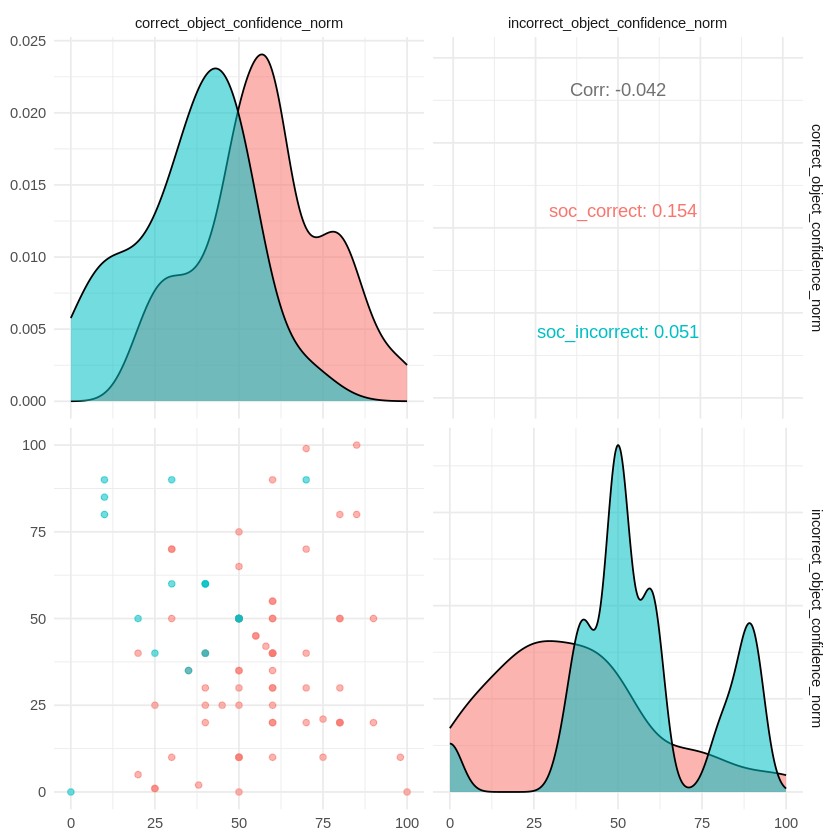

In [52]:
ggpairs(LCAdata_forced_choice[LCAdata_forced_choice$training_order=="causal_first",],
        columns = c("correct_object_confidence_norm",
                    "incorrect_object_confidence_norm"),
        ggplot2::aes(colour = forced_response, alpha = 0.4)) +
  theme_minimal()

Here we are looking at the distribution of participant's normalized confidence ratings of test trial objects for the causal training first condition. Correct object indicates the object that should be judged as being causal by second-order correlation learning, and incorrect object indicates the object that should not be judged as being causal by second-order correlation learning.

Looking at the first top left plot of correct object confidence ratings, we see that participants who are correct and incorrect have different distributional peaks for the correct object rating. This makes intuitive sense as we would expect correct respondents to rate the correct object as being more causal than incorrect respondents.

Looking at the bottom right plot of incorrect object confidence ratings, we see that correct respondents have a much more flat right-skew distribution, while we see a bimodal distribution for incorrect respondents. The observed right-skew of correct respondents makes intuitve sense as we would expect correct respondents to have a lower causal confidence rating for the incorrect object. The bimodal distribution cannot be easily interpreted.

Overall, comparing the two density plots while looking at low correlation between the two confidence ratings suggest that our assumption that participants are treating these object evaluations to be independent of one another holds. If our assumption did not hold (i.e., participants are making assessments about an object's causal status relative to the other object), we would expect to see there to be stronger correlation between the correct and incorrect ratings, especially for correct respondents.

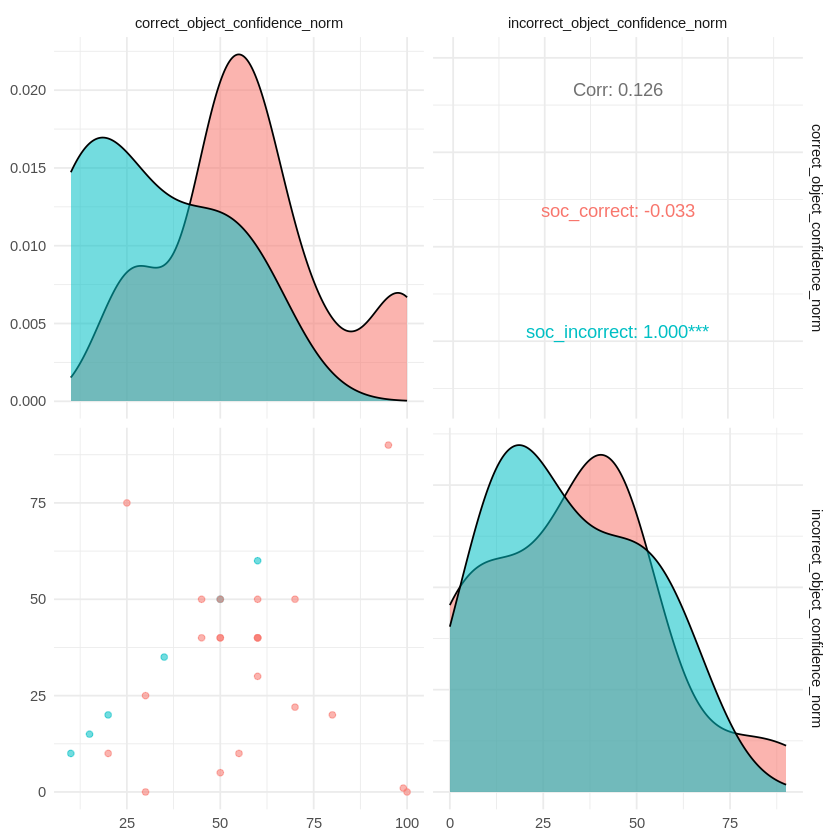

In [53]:
ggpairs(LCAdata_forced_choice[LCAdata_forced_choice$training_order=="noncausal_first",],
        columns = c("correct_object_confidence_norm",
                    "incorrect_object_confidence_norm"),
        ggplot2::aes(colour = forced_response, alpha = 0.4)) +
  theme_minimal()

Here we are looking at the distribution of participant's normalized confidence ratings of test trial objects for the noncausal training first condition.

Looking at the first top left plot of correct object confidence ratings, we again see that participants who are correct and incorrect have different distributional peaks for the correct object rating. This makes intuitive sense as we expect correct respondents to rate the correct object as being more causal than incorrect respondents.

Looking at the bottom right plot of incorrect object confidence ratings, we see that that there different distributional peaks for the incorrect object ratings between correct and incorrect respondents. Interestingly, the correct respondents seem to be rating the incorrect object more highly in comaprison to the incorrect respondents.

What is interesting to note is that while correct respondents again show low correlation between rating of correct object and rating of incorrect object, incorrect respondents show a perfect correlation between the two measures. However, there is no intuitive explanation for why this may be the case.

## Hypothesis Testing
The first research question is simply, "Can adult participants engage in second-order correlation (SOC) learning to make causal inferences in the above described task?"

Putting this into a **verbal hypothesis**: The probability of selecting the correct object but not the incorrect object is greater than random chance.

Putting this into a **statistical form**: $P(response = correct) > 0.5$

### Binomial Test

In [54]:
table(LCAdata_forced_choice$forced_response)
binom.test(c(90, 27), p = 1/2)


  soc_correct soc_incorrect 
           90            27 


	Exact binomial test

data:  c(90, 27)
number of successes = 90, number of trials = 117, p-value = 4.167e-09
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6822854 0.8420804
sample estimates:
probability of success 
             0.7692308 


With the simulated responses, we see that adult learners were far above chance to make the correct inference.

The second research question is, "Are adults inference performance in the task affected by the timing of causal training presentation?"

Direction of change in inference performance is not hypothesized because there is no a priori reason to predict one over the other. More specifically, we are agnostic between a positive increase in inference performance with early causal training vs. negative decrease in inference performance with early causal training, both can be plausibly justified, and can be explored further in a follow-up if effect is found.

Putting this into a **verbal hypothesis**: The timing of causal training presentation affects the log-odds of successful inference performance in the task.

Putting this into a **statistical form**:

We can state the model as (but not limited to), ${logit}(P(Y_{ij} = 1)) = \beta_0 + \beta_1 X_{ij} +
 u_i$, where $Y_{ij}$ represents the binary response variable for participant $i$ given training order condition $j$ and $\beta_1$ indicates the coefficient for the training order.

Thus, given our hypothesis, we expect $\beta_1 \neq 0$

There's two ways we can answer this question. First, by looking at the binary outcome variable (that we simulated from individual evaluation) as I have explained earlier. Second, by looking at the influence of training order on participant's confidence rating for correct and incorrect objects.

### Mixed-Effects Regression Models

In [56]:
#setting the reference level for regression
LCAdata_forced_choice$forced_response <- relevel(LCAdata_forced_choice$forced_response, ref = "soc_incorrect")
LCAdata_forced_choice$training_order <- relevel(as.factor(LCAdata_forced_choice$training_order),
                                                ref = "noncausal_first")
LCAdata_forced_choice$task_order <- as.factor(LCAdata_forced_choice$task_order)
LCAdata_forced_choice$task_type <- as.factor(LCAdata_forced_choice$task_type)

forced_response_lr <- glm(forced_response ~ task_order + task_type + training_order,
                          data = LCAdata_forced_choice, family = binomial)
forced_response_melr <- glmer(forced_response ~ task_order + task_type + training_order + (1|id),
                              data = LCAdata_forced_choice, family = binomial)

print("*******forced_response_lr********")
summary(forced_response_lr)

print("******forced_response_melr*******")
summary(forced_response_melr)

[1] "*******forced_response_lr********"



Call:
glm(formula = forced_response ~ task_order + task_type + training_order, 
    family = binomial, data = LCAdata_forced_choice)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                  0.6753     0.7245   0.932    0.351
task_ordersimple_first       0.1083     0.4465   0.243    0.808
task_typesimple              0.5668     0.5240   1.082    0.279
training_ordercausal_first   0.2092     0.6234   0.336    0.737

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 126.41  on 116  degrees of freedom
Residual deviance: 125.04  on 113  degrees of freedom
AIC: 133.04

Number of Fisher Scoring iterations: 4


[1] "******forced_response_melr*******"


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: forced_response ~ task_order + task_type + training_order + (1 |  
    id)
   Data: LCAdata_forced_choice

     AIC      BIC   logLik deviance df.resid 
   132.9    146.7    -61.5    122.9      112 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9285  0.2690  0.3060  0.4235  0.8008 

Random effects:
 Groups Name        Variance Std.Dev.
 id     (Intercept) 2.12     1.456   
Number of obs: 117, groups:  id, 78

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                  1.1098     1.0700   1.037    0.300
task_ordersimple_first       0.1583     0.6403   0.247    0.805
task_typesimple              0.8070     0.6984   1.156    0.248
training_ordercausal_first   0.1120     0.8021   0.140    0.889

Correlation of Fixed Effects:
            (Intr) tsk_r_ tsk_ty
tsk_rdrsmp_ -0.214              
tsk_t

In [57]:
simulated_choice_ic = AIC(forced_response_lr, forced_response_melr)
simulated_choice_ic
diff(simulated_choice_ic$AIC)

,df,AIC
,<dbl>,<dbl>
forced_response_lr,4,133.041
forced_response_melr,5,132.917


[1] -0.1240737

In [58]:
Anova(forced_response_melr)


,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
task_order,0.06112592,1,0.8047251
task_type,1.33519667,1,0.2478828
training_order,0.01948574,1,0.8889829


Mixed-effects logistic regression is chosen due to slightly smaller AIC (difference of 0.1240737) but there are no main effects to report.


Now let's look at if there is any main effect of training order on the normalized confidence rating.

In [59]:
correct_object_lr <- glm(correct_object_confidence_norm ~ task_order + task_type + training_order,
                         data = LCAdata_forced_choice)
correct_object_melr <- glmer(correct_object_confidence_norm ~ task_order + task_type + training_order + (1 | id),
                             data = LCAdata_forced_choice)

print("*******correct_object_lr********")
summary(correct_object_lr)

print("******correct_object_melr*******")
summary(correct_object_melr)

Warning message in glmer(correct_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”


[1] "*******correct_object_lr********"



Call:
glm(formula = correct_object_confidence_norm ~ task_order + task_type + 
    training_order, data = LCAdata_forced_choice)

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  60.398      6.403   9.432 6.28e-16 ***
task_ordersimple_first       -2.384      4.045  -0.589    0.557    
task_typesimple              -7.192      4.606  -1.562    0.121    
training_ordercausal_first   -3.703      5.343  -0.693    0.490    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 462.4049)

    Null deviance: 53608  on 116  degrees of freedom
Residual deviance: 52252  on 113  degrees of freedom
AIC: 1055.9

Number of Fisher Scoring iterations: 2


[1] "******correct_object_melr*******"


Linear mixed model fit by REML ['lmerMod']
Formula: 
correct_object_confidence_norm ~ task_order + task_type + training_order +  
    (1 | id)
   Data: LCAdata_forced_choice

REML criterion at convergence: 1027.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.12556 -0.52704  0.03604  0.51450  2.28861 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept)  62.17    7.885  
 Residual             401.07   20.027  
Number of obs: 117, groups:  id, 78

Fixed effects:
                           Estimate Std. Error t value
(Intercept)                  61.051      6.454   9.459
task_ordersimple_first       -2.104      4.221  -0.498
task_typesimple              -7.189      4.463  -1.611
training_ordercausal_first   -4.696      5.320  -0.883

Correlation of Fixed Effects:
            (Intr) tsk_r_ tsk_ty
tsk_rdrsmp_ -0.301              
tsk_typsmpl -0.695 -0.073       
trnng_rdrc_ -0.802 -0.081  0.513

In [60]:
correct_object_ic = AIC(correct_object_lr, correct_object_melr)
correct_object_ic
diff(correct_object_ic$AIC)

,df,AIC
,<dbl>,<dbl>
correct_object_lr,5,1055.925
correct_object_melr,6,1039.785


[1] -16.13976

In [62]:
Anova(correct_object_melr)

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
task_order,0.2484834,1,0.6181450
task_type,2.5947350,1,0.1072194
training_order,0.7793378,1,0.3773437


Similarly, we choose the mixed effects regression model because it has a slightly lower AIC (difference of 16.13976). However, there are no main effects to report. As such, the mixed-effects logistic regression model suggests that we fail to reject the null hypothesis that the order in which causal information is presented to adult learners have no influence on producing the correct test response.


In [63]:
incorrect_object_lr <- glm(incorrect_object_confidence_norm ~ task_order + task_type + training_order,
                           data = LCAdata_forced_choice)
incorrect_object_melr <- glmer(incorrect_object_confidence_norm ~ task_order + task_type + training_order + (1 | id),
                               data = LCAdata_forced_choice)

print("*******incorrect_object_lr********")
summary(incorrect_object_lr)

print("******incorrect_object_melr*******")
summary(incorrect_object_melr)

Warning message in glmer(incorrect_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
boundary (singular) fit: see help('isSingular')



[1] "*******incorrect_object_lr********"



Call:
glm(formula = incorrect_object_confidence_norm ~ task_order + 
    task_type + training_order, data = LCAdata_forced_choice)

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  44.160      6.786   6.508 2.17e-09 ***
task_ordersimple_first       11.228      4.287   2.619 0.010018 *  
task_typesimple             -17.389      4.881  -3.563 0.000538 ***
training_ordercausal_first   -2.148      5.663  -0.379 0.705191    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 519.2756)

    Null deviance: 69656  on 116  degrees of freedom
Residual deviance: 58678  on 113  degrees of freedom
AIC: 1069.5

Number of Fisher Scoring iterations: 2


[1] "******incorrect_object_melr*******"


Linear mixed model fit by REML ['lmerMod']
Formula: 
incorrect_object_confidence_norm ~ task_order + task_type + training_order +  
    (1 | id)
   Data: LCAdata_forced_choice

REML criterion at convergence: 1041.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8975 -0.7466 -0.1422  0.6209  2.7747 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept)   0.0     0.00   
 Residual             519.3    22.79   
Number of obs: 117, groups:  id, 78

Fixed effects:
                           Estimate Std. Error t value
(Intercept)                  44.160      6.786   6.508
task_ordersimple_first       11.228      4.287   2.619
task_typesimple             -17.389      4.881  -3.563
training_ordercausal_first   -2.148      5.663  -0.379

Correlation of Fixed Effects:
            (Intr) tsk_r_ tsk_ty
tsk_rdrsmp_ -0.287              
tsk_typsmpl -0.695 -0.071       
trnng_rdrc_ -0.806 -0.080  0.487
optimizer (nloptwrap) convergence code: 0 (OK)
boundary 

In [64]:
incorrect_object_ic = AIC(incorrect_object_lr, incorrect_object_melr)
incorrect_object_ic
diff(incorrect_object_ic$AIC)

,df,AIC
,<dbl>,<dbl>
incorrect_object_lr,5,1069.497
incorrect_object_melr,6,1053.454


[1] -16.04208

In [65]:
Anova(incorrect_object_melr)

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
task_order,6.8611179,1,0.0088091420
task_type,12.6941867,1,0.0003667941
training_order,0.1438543,1,0.7044789891


In the mixed-effects regression model of confidence rating for the incorrect object, we find main effects of task_order and task_type. However, this is difficult to interpret because it is unclear what the explanation underlying this relationship is and why a similar relationship is not observed with the rating of correct object.


### Bootstrap

To better understand the results of our model, let's use a resampling technique with replacement, the bootstrap, to quantify the uncertainty in our data. Asking, what is the range of values we expect for the coefficient of training order in our models given the degree of variation in our dataset.

In [66]:
# bootstrap function for forced response
boot.forced_response <- function(data, indices) {
  # Subset the data based on the bootstrap indices
  boot_data <- data[indices, ]

  # Fit the model on the bootstrap sample
  model <- glmer(forced_response ~ task_order + task_type + training_order + (1 | id),
                 data = boot_data, family = binomial)

  # Extract fixed-effects coefficients as the result
  return(fixef(model))
}

# testing the bootstrap function
print(boot.forced_response(LCAdata_forced_choice, 1:117)) #works.

               (Intercept)     task_ordersimple_first 
                 1.1098010                  0.1583078 
           task_typesimple training_ordercausal_first 
                 0.8070235                  0.1119666 


In [67]:
boot.forced_response_obj = boot(LCAdata_forced_choice, boot.forced_response, R = 1000)
print(boot.forced_response_obj)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0417981 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0262958 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0373017 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0330785 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0397396 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0336697 (tol = 0.002, compon


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = LCAdata_forced_choice, statistic = boot.forced_response, 
    R = 1000)


Bootstrap Statistics :
     original    bias    std. error
t1* 1.1098010 12.799081   12.084787
t2* 0.1583078  0.447765    2.564167
t3* 0.8070235  4.938129    7.513944
t4* 0.1119666 -2.946002   10.057384


[1] 13.90888

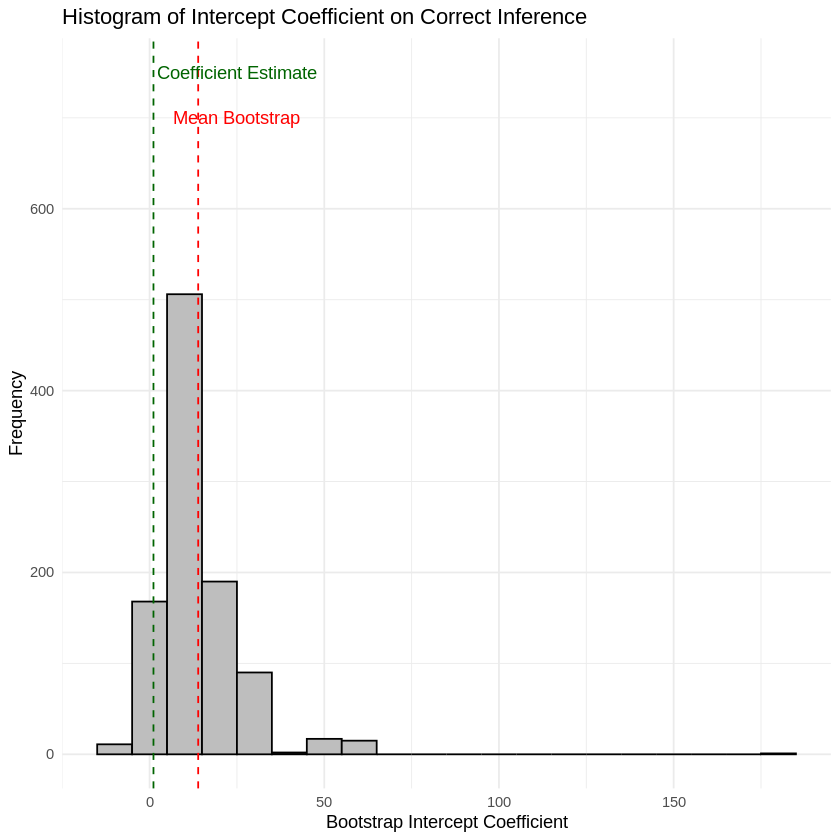

In [68]:
intercept_bootstrap_estimates <- boot.forced_response_obj$t[, 1]
intercept_bootstrap_estimates_df <- data.frame(BootstrapEstimates = intercept_bootstrap_estimates)

real_intercept_coef <- 1.1098017

# Plot using ggplot2
ggplot(intercept_bootstrap_estimates_df, aes(x = BootstrapEstimates)) +
  geom_histogram(binwidth = 10, color = "black", fill = "grey") +
  geom_vline(xintercept = real_intercept_coef, color = "darkgreen", linetype = "dashed") +
  geom_vline(xintercept = mean(intercept_bootstrap_estimates), color = "red", linetype = "dashed") +
  labs(title = "Histogram of Intercept Coefficient on Correct Inference",
       x = "Bootstrap Intercept Coefficient",
       y = "Frequency") +
  annotate("text", x = 25, y = 750, label = "Coefficient Estimate", color = "darkgreen") +
  annotate("text", x = 25, y = 700, label = "Mean Bootstrap", color = "red") +
  theme_minimal()

mean(intercept_bootstrap_estimates)

[1] -2.834035

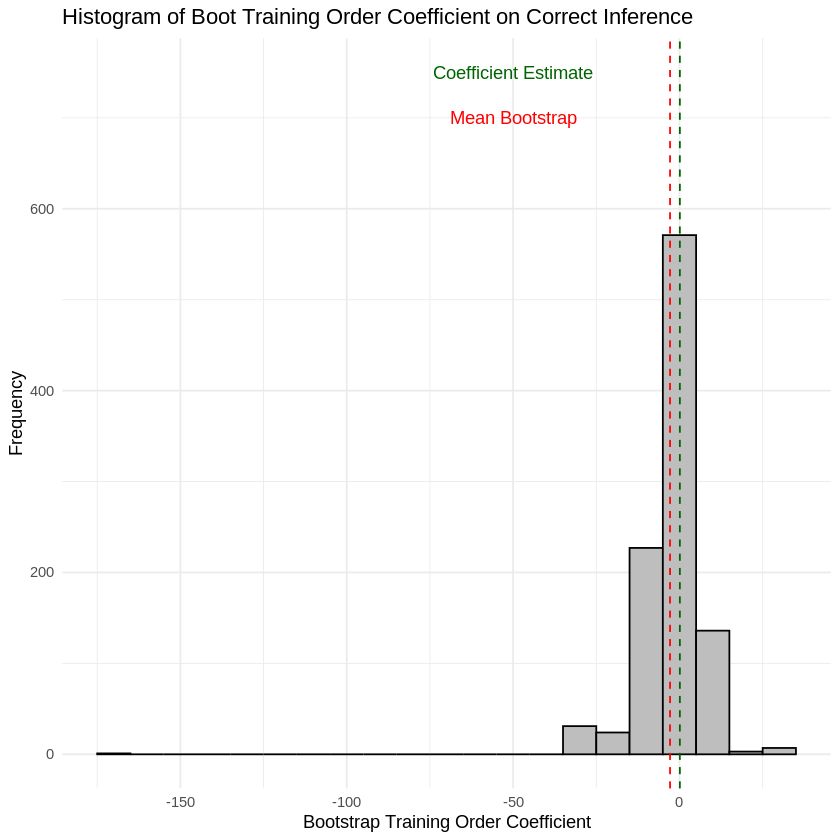

In [73]:
training_order_bootstrap_estimates <- boot.forced_response_obj$t[, 4]
training_order_bootstrap_estimates_df <- data.frame(BootstrapEstimates = training_order_bootstrap_estimates)

real_training_order_coef <- 0.1119642

# Plot using ggplot2
ggplot(training_order_bootstrap_estimates_df, aes(x = BootstrapEstimates)) +
  geom_histogram(binwidth = 10, color = "black", fill = "grey") +
  geom_vline(xintercept = real_training_order_coef, color = "darkgreen", linetype = "dashed") +
  geom_vline(xintercept = mean(training_order_bootstrap_estimates), color = "red", linetype = "dashed") +
  labs(title = "Histogram of Boot Training Order Coefficient on Correct Inference",
       x = "Bootstrap Training Order Coefficient",
       y = "Frequency") +
  annotate("text", x = -50, y = 750, label = "Coefficient Estimate", color = "darkgreen") +
  annotate("text", x = -50, y = 700, label = "Mean Bootstrap", color = "red") +
  theme_minimal()

mean(training_order_bootstrap_estimates)

In [75]:
boot.ci(boot.out = boot.forced_response_obj, type = c("norm", "basic", "perc", "bca"), index = 4)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot.forced_response_obj, type = c("norm", 
    "basic", "perc", "bca"), index = 4)

Intervals : 
Level      Normal              Basic         
95%   (-16.6541,  22.7701 )   (-11.7646,  28.1759 )  

Level     Percentile            BCa          
95%   (-27.9520,  11.9885 )   (-12.4238,  30.1531 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

After running a few iterations of the boostrap, it is very clear that there is very high uncertainty in the data.

In [74]:
# bootstrap function for normalized confidence rating of correct object
boot.correct_confidence_norm <- function(data, indices) {
  # Subset the data based on the bootstrap indices
  boot_data <- data[indices, ]

  # Fit the model on the bootstrap sample
  model <- glmer(correct_object_confidence_norm ~ task_order + task_type + training_order + (1 | id),
                 data = boot_data)

  # Extract fixed-effects coefficients as the result
  return(fixef(model))
}

# testing the bootstrap function
print(boot.correct_confidence_norm(LCAdata_forced_choice, 1:117)) #works.

Warning message in glmer(correct_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”


               (Intercept)     task_ordersimple_first 
                 61.050963                  -2.104119 
           task_typesimple training_ordercausal_first 
                 -7.188526                  -4.696119 


In [76]:
boot.correct_confidence_norm_obj = boot(LCAdata_forced_choice, boot.correct_confidence_norm, R = 1000)
print(boot.correct_confidence_norm_obj)

Warning message in glmer(correct_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
Warning message in glmer(correct_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
Warning message in glmer(correct_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
Warning message in glmer(correct_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
Warning message in glmer(correct_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprec


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = LCAdata_forced_choice, statistic = boot.correct_confidence_norm, 
    R = 1000)


Bootstrap Statistics :
     original     bias    std. error
t1* 61.050963  2.1724922    7.360679
t2* -2.104119  0.5786680    3.597571
t3* -7.188526  0.9548378    4.703199
t4* -4.696119 -3.8872549    6.940248


[1] -8.583374

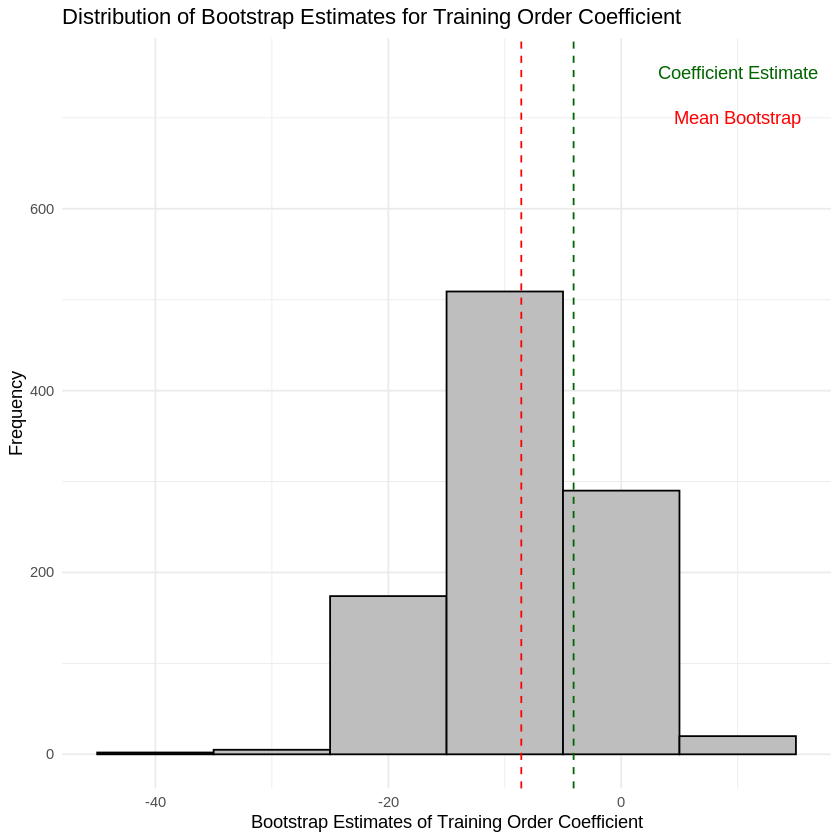

In [77]:
bootstrap_estimates <- boot.correct_confidence_norm_obj$t[, 4]
bootstrap_estimates_df <- data.frame(BootstrapEstimates = bootstrap_estimates)

# Plot using ggplot2
ggplot(bootstrap_estimates_df, aes(x = BootstrapEstimates)) +
  geom_histogram(binwidth = 10, color = "black", fill = "grey") +
  geom_vline(xintercept = -4.0900312, color = "darkgreen", linetype = "dashed") +
  geom_vline(xintercept = mean(bootstrap_estimates), color = "red", linetype = "dashed") +
  #geom_density(alpha = .2, fill = "#FF6666") +
  labs(title = "Distribution of Bootstrap Estimates for Training Order Coefficient",
       x = "Bootstrap Estimates of Training Order Coefficient",
       y = "Frequency") +
  annotate("text", x = 10, y = 750, label = "Coefficient Estimate", color = "darkgreen") +
  annotate("text", x = 10, y = 700, label = "Mean Bootstrap", color = "red") +
  theme_minimal()

mean(bootstrap_estimates)

In [79]:
boot.ci(boot.out = boot.correct_confidence_norm_obj, type = c("norm", "basic", "perc", "bca"), index = 4)

Warning message in norm.inter(t, adj.alpha):
“extreme order statistics used as endpoints”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot.correct_confidence_norm_obj, type = c("norm", 
    "basic", "perc", "bca"), index = 4)

Intervals : 
Level      Normal              Basic         
95%   (-14.412,  12.794 )   (-13.828,  12.391 )  

Level     Percentile            BCa          
95%   (-21.783,   4.435 )   (-14.782,  10.897 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

In [78]:
# bootstrap function for forced response
boot.incorrect_confidence_norm <- function(data, indices) {
  # Subset the data based on the bootstrap indices
  boot_data <- data[indices, ]

  # Fit the model on the bootstrap sample
  model <- glmer(incorrect_object_confidence_norm ~ task_order + task_type + training_order + (1 | id),
                 data = boot_data)

  # Extract fixed-effects coefficients as the result
  return(fixef(model))
}

# testing the bootstrap function
print(boot.incorrect_confidence_norm(LCAdata_forced_choice, 1:117))

Warning message in glmer(incorrect_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
boundary (singular) fit: see help('isSingular')



               (Intercept)     task_ordersimple_first 
                 44.159742                  11.228474 
           task_typesimple training_ordercausal_first 
                -17.389282                  -2.147687 


In [80]:
boot.incorrect_confidence_norm_obj = boot(LCAdata_forced_choice, boot.incorrect_confidence_norm, R = 1000)
print(boot.incorrect_confidence_norm_obj)

Warning message in glmer(incorrect_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
boundary (singular) fit: see help('isSingular')

Warning message in glmer(incorrect_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
Warning message in glmer(incorrect_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
Warning message in glmer(incorrect_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”
Warning message in glmer(incorrect_object_confidence_norm ~ task_order + task_type + :
“calling glmer() with family


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = LCAdata_forced_choice, statistic = boot.incorrect_confidence_norm, 
    R = 1000)


Bootstrap Statistics :
      original     bias    std. error
t1*  44.159742 -1.1926764    8.435098
t2*  11.228474  0.6982679    3.884881
t3* -17.389282  1.5621802    6.263466
t4*  -2.147687 -0.5134358    7.205258


[1] -2.661123

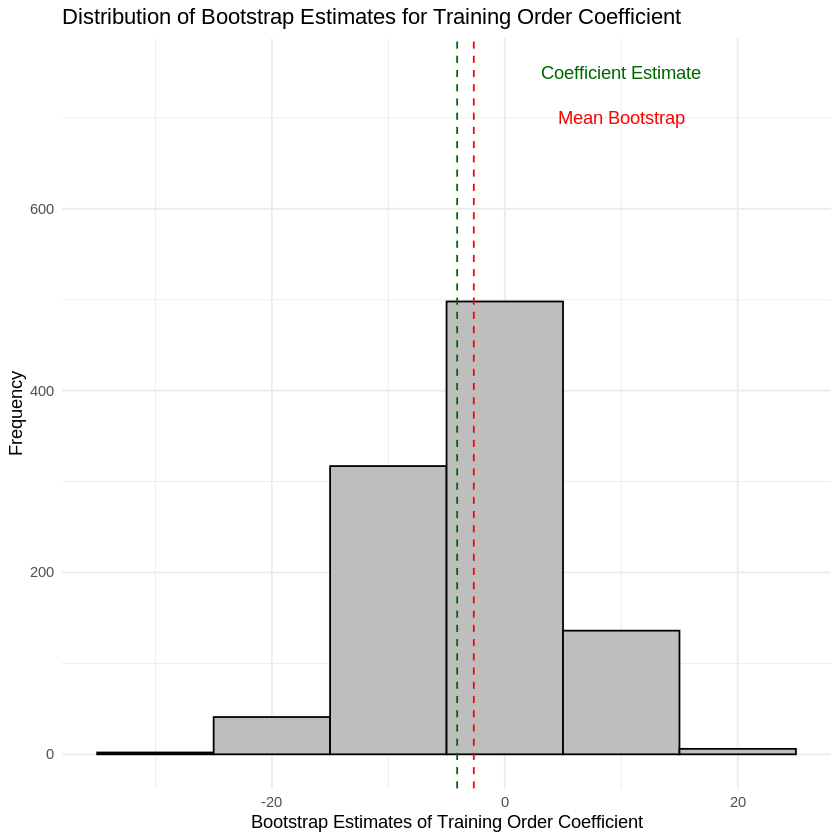

In [81]:
bootstrap_estimates <- boot.incorrect_confidence_norm_obj$t[, 4]
bootstrap_estimates_df <- data.frame(BootstrapEstimates = bootstrap_estimates)

# Plot using ggplot2
ggplot(bootstrap_estimates_df, aes(x = BootstrapEstimates)) +
  geom_histogram(binwidth = 10, color = "black", fill = "grey") +
  geom_vline(xintercept = -4.0900312, color = "darkgreen", linetype = "dashed") +
  geom_vline(xintercept = mean(bootstrap_estimates), color = "red", linetype = "dashed") +
  #geom_density(alpha = .2, fill = "#FF6666") +
  labs(title = "Distribution of Bootstrap Estimates for Training Order Coefficient",
       x = "Bootstrap Estimates of Training Order Coefficient",
       y = "Frequency") +
  annotate("text", x = 10, y = 750, label = "Coefficient Estimate", color = "darkgreen") +
  annotate("text", x = 10, y = 700, label = "Mean Bootstrap", color = "red") +
  theme_minimal()

mean(bootstrap_estimates)

In [82]:
boot.ci(boot.out = boot.incorrect_confidence_norm_obj, type = c("norm", "basic", "perc", "bca"), index = 4)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot.incorrect_confidence_norm_obj, type = c("norm", 
    "basic", "perc", "bca"), index = 4)

Intervals : 
Level      Normal              Basic         
95%   (-15.756,  12.488 )   (-15.517,  12.648 )  

Level     Percentile            BCa          
95%   (-16.944,  11.222 )   (-16.647,  12.547 )  
Calculations and Intervals on Original Scale

The bootstrap results on the influence of training order on object confidence ratings, though more reliable, still demonstrate extremely wide bootstrap confidence intervals and therefore high uncertainty.

### Power Analysis
The combination of our hypothesis testing via mixed-effects regression models and bootstrap analysis shows that 1. we fail to reject the null hypothesis that the time at which you receive causal information does not meaningfully influence a learner's causal inferences, 2. there is significant level of uncertainty with respect to the specific parameter estimates from our collected sample.

This present sample is an incomplete sample of an exploratory study with no prior works exploring the same effect. As such, at the very least, let's use the Monte Carlo power analysis approach to understand what coverage this current sample has.

In [83]:
n_subjects = 82
n_trials = 1
intercept = 1.1098017
intercept_sd = 1.0700
beta_task_order = 0.1583115
sd_task_order = 0.6403
beta_task_type = 0.8070231
sd_task_type = 0.6984
beta_training_order = 0.1119642
sd_training_order = 0.8021
mem_check_fail_rate = 0.2865853659

simulate_data <- function(n_subjects, n_trials, intercept, intercept_sd,
                          beta_task_order, sd_task_order,
                          beta_task_type, sd_task_type,
                          beta_training_order, sd_training_order,
                          mem_check_fail_rate) {
  # draw observation from a normal distribution
  subject_intercepts <- rnorm(n_subjects, intercept, intercept_sd)
  # sample from a distribution centered at mean subject RT, varying with sd of subject RT
  task_order_slopes <- rnorm(n_subjects, beta_task_order, sd_task_order)
  # sample from distribution centered at mean effect size, varying with sd of effect size
  task_type_slopes <- rnorm(n_subjects, beta_task_type, sd_task_type)
  # sample from distribution centered at mean effect size, varying with sd of effect size
  training_order_slopes <- rnorm(n_subjects, beta_training_order, sd_training_order)
  # sample from distribution centered at mean effect size, varying with sd of effect size
  dummy_task_order <- rbinom(n_subjects, 1, 0.5) # dummy variable for task_order
  dummy_simple_training_order <- rbinom(n_subjects, 1, 0.5) # dummy variable for training_order
  dummy_highmem_training_order <- rbinom(n_subjects, 1, 0.5) # dummy variable for training_order
  simple_mem_check <- rbinom(n_subjects, 1, (1-mem_check_fail_rate)) # simple_mem_check
  highmem_mem_check <- rbinom(n_subjects, 1, (1-mem_check_fail_rate)) # highmem_mem_check
  dat <- data.frame(subject = 1:n_subjects, intercept = subject_intercepts,
                    task_order_slope=task_order_slopes, task_type=task_type_slopes,
                    training_order_slope=training_order_slopes,
                    task_order = dummy_task_order,
                    simple_training_order = dummy_simple_training_order,
                    highmem_training_order = dummy_highmem_training_order,
                    simple_mem_check, highmem_mem_check)
  # generate trials for each subject
  dat <- dat %>%
    mutate(simple_response = map2(intercept + task_order_slope * task_order + task_type + training_order_slope * simple_training_order, n_trials,
                                  ~ rbinom(.y, 1, 1/(1+exp(-.x)))),
           highmem_response = map2(intercept + task_order_slope * (1-dummy_task_order) + training_order_slope * highmem_training_order, n_trials,
                                   ~ rbinom(.y, 1, 1/(1+exp(-.x)))))

  # Expand the list columns into multiple rows
  dat <- dat %>%
    unnest(cols = c(simple_response, highmem_response))

  return(dat)
}

set.seed(2024)
sim_dat <- simulate_data(n_subjects, n_trials, intercept, intercept_sd,
                         beta_task_order, sd_task_order,
                         beta_task_type, sd_task_type,
                         beta_training_order, sd_training_order,
                         mem_check_fail_rate)
sim_dat <- as.data.frame(sim_dat)
head(sim_dat)
# task_order: 0 = highmem first, 1 = simple first
# training_order: 0 = noncausal first, 1 = causal first

,subject,intercept,task_order_slope,task_type,training_order_slope,task_order,simple_training_order,highmem_training_order,simple_mem_check,highmem_mem_check,simple_response,highmem_response
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2.1605090,0.711508379,0.5412777,-0.3409692,0,0,1,0,1,1,1
2,2,1.6113268,-0.965439683,0.3650157,0.3187733,1,0,1,1,1,1,0
3,3,0.9942724,0.253593402,0.9027173,-0.7879561,0,1,1,1,1,1,0
4,4,0.8820221,0.869092241,-0.3979355,0.2347796,1,0,0,1,1,0,1
5,5,2.3489670,0.041294809,1.6611005,1.4989055,1,0,1,1,1,1,1
6,6,2.4926214,-0.005085228,2.3407375,0.2502384,1,0,0,1,0,1,0


In [84]:
tall_sim_data <- reshape(sim_dat,
                         varying=list(training_order = c(7,8),
                                      response_cat = c(11,12),
                                      mem_check = c(9,10)),
                         v.names=c("training_order", "response_cat", "mem_check"),
                         direction="long",
                         times=c("simple", "highmem"),
                         timevar="task_type",
                         new.row.names = 1:1e6)

# Restructure the dataframe to contain only the specified columns and in the specified order
tall_sim_data <- tall_sim_data %>%
  select(id, task_type, task_order, training_order, response_cat, mem_check) %>%
  arrange(id) %>%
  # Convert all variables into factors
  mutate(across(everything(), as.factor)) %>%
  # Update task_order to have labels
  mutate(task_order = fct_recode(task_order,
                                 simple_first = "1",
                                 highmem_first = "0")) %>%
  mutate(training_order = fct_recode(training_order,
                                     causal_first = "1",
                                     noncausal_first = "0")) %>%
  mutate(response_cat = fct_recode(response_cat,
                                   soc_correct = "1",
                                   soc_incorrect = "0")) %>%
  mutate(mem_check = fct_recode(mem_check,
                                pass = "1",
                                fail = "0"))

head(tall_sim_data)

,id,task_type,task_order,training_order,response_cat,mem_check
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,simple,highmem_first,noncausal_first,soc_correct,fail
2,1,highmem,highmem_first,causal_first,soc_correct,pass
3,2,simple,simple_first,noncausal_first,soc_correct,pass
4,2,highmem,simple_first,causal_first,soc_incorrect,pass
5,3,simple,highmem_first,causal_first,soc_correct,pass
6,3,highmem,highmem_first,causal_first,soc_incorrect,pass


In [85]:
run_analysis <- function(simulated_data) {
  fit_response <- glmer(response_cat ~ task_order + task_type + training_order + (1 | id),
                        data = simulated_data, family = binomial)
  est <- fixef(fit_response)[4] # estimate of the training_order
  se <- summary(fit_response)$coef[, 2, drop = FALSE][4]
  chisq_statistic <- Anova(fit_response)[, 1][3]
  pval <- Anova(fit_response)[, 3][3]
  return(c(est, se, chisq_statistic, pval))
}

run_analysis(tall_sim_data)

boundary (singular) fit: see help('isSingular')



training_ordercausal_first                            
                 0.4048323                  0.3833453 
                                                      
                 1.1152443                  0.2909448

In [86]:
repeat_analysis <- function(n_simulations, alpha, n_subjects,
                            n_trials, intercept, intercept_sd,
                            beta_task_order, sd_task_order,
                            beta_task_type, sd_task_type,
                            beta_training_order, sd_training_order,
                            mem_check_fail_rate) {
  simouts <- matrix(rep(NA, n_simulations*4), nrow=n_simulations, ncol=4)

  for (i in 1:n_simulations) {
    data <- simulate_data(n_subjects, n_trials, intercept, intercept_sd,
                          beta_task_order, sd_task_order,
                          beta_task_type, sd_task_type,
                          beta_training_order, sd_training_order,
                          mem_check_fail_rate)
    data <- as.data.frame(data)
    tall_data <- reshape(data,
                         varying=list(training_order = c(7,8),
                                      response_cat = c(11,12),
                                      mem_check = c(9,10)),
                         v.names=c("training_order", "response_cat", "mem_check"),
                         direction="long",
                         times=c("simple", "highmem"),
                         timevar="task_type",
                         new.row.names = 1:1e6)

    # Restructure the dataframe to contain only the specified columns and in the specified order
    tall_data <- tall_data %>%
      select(id, task_type, task_order, training_order, response_cat, mem_check) %>%
      arrange(id) %>%
      # Convert all variables into factors
      mutate(across(everything(), as.factor)) %>%
      # Update task_order to have labels
      mutate(task_order = fct_recode(task_order,
                                     simple_first = "1",
                                     highmem_first = "0")) %>%
      mutate(training_order = fct_recode(training_order,
                                         causal_first = "1",
                                         noncausal_first = "0")) %>%
      mutate(response_cat = fct_recode(response_cat,
                                       soc_correct = "1",
                                       soc_incorrect = "0")) %>%
      mutate(mem_check = fct_recode(mem_check,
                                    pass = "1",
                                    fail = "0"))
    simouts[i,] <- run_analysis(tall_data)
  }

   # calculate how many of the simulations had significant results (coverage)
    cvg <- mean(simouts[,4] <= alpha)
    # calculate relative parameter estimate bias
    theta_bias <- ( mean(simouts[,1]) - beta_training_order ) / (beta_training_order)
    # calculate relative standard error bias
    sigma_bias <- (mean(simouts[,2]) - sd(simouts[,1])) / sd(simouts[,1])
    return(list(coverage = cvg, theta_bias = theta_bias, sigma_bias = sigma_bias))
}

In [87]:
n_simulations <- 1000
alpha <- 0.05
n_subjects = 82
n_trials = 1
intercept = 1.1098017
intercept_sd = 1.0700
beta_task_order = 0.1583115
sd_task_order = 0.6403
beta_task_type = 0.8070231
sd_task_type = 0.6984
beta_training_order = 0.1119642
sd_training_order = 0.8021
mem_check_fail_rate = 0.2865853659

sim1000_results <- repeat_analysis(n_simulations, alpha, n_subjects,
                                  n_trials, intercept, intercept_sd,
                                  beta_task_order, sd_task_order,
                                  beta_task_type, sd_task_type,
                                  beta_training_order, sd_training_order,
                                  mem_check_fail_rate)

print(sim1000_results)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0131266 (tol = 0.002, component 1)”
boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')


$coverage
[1] 0.068

$theta_bias
[1] -0.943375

$sigma_bias
[1] -0.1824448



The power analysis shows that we have an extremely low coverage of 6.8%. Further, we see a sizable negative bias, suggesting that the model consistently underestimates the true effect of training order. At this power, we are extremely unlikely to detect an effect even if there is a true effect - Type II error rate is very high.

## Conclusion

Here we tested two hypotheses. First, we tested whether adult learners can engage in second-order correlation (SOC) learning to make causal inferences, hypothesizing that the probability of selecting the correct object but not the incorrect object is greater than random chance of 50%. Based on simulated binary responses, we concluded that we reject the null hypothesis that adult learners would show chance level performance in selecting the correct object but not the incorrect object, p < 0.05. Second, we tested whether adult learners are influenced by the timing of causal training presentation, hypothesizing that the timing of causal training presentation affects the log-odds of successful inference performance in the task. A mixed-effects regression analysis examining how training order influenced a) log odds of correct response, and b) confidence rating of correct and incorrect objects were conducted but did not find a significant relationship. Further bootstrap analysis of the parameter estimates from the mixed-effects models indicated significant uncertainty in the data leading to extremely wide bootstrap confidence intervals. Lastly, power analysis suggested that the experiment was grossly underpowered to detect an effect, given the model estimates as parameters for the power analysis.